In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2018
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2018-03-01 to 2018-05-31
Columns: 400 entries, 10000009 to 9000451
dtypes: float64(400)
memory usage: 288.2 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-03-01  0.881809  0.843611  0.672251  0.919597  0.630393  0.828019   
2018-03-02  0.856435  0.845838  0.656388  0.901752  0.637014  0.837836   
2018-03-03  0.864419  0.848536  0.643403  0.900832  0.639041  0.840841   
2018-03-04  0.859497  0.843748  0.638683  0.896287  0.646483  0.851877   
2018-03-05  0.874607  0.849256  0.633385  0.905888  0.659168  0.870685   
...              ...       ...       ...       ...       ...       ...   
2018-05-27  0.650446  0.476062  0.296611  0.618466  0.431392  0.532940   
2018-05-28  0.656627  0.480555  0.296383  0.624582  0.430644  0.531832   
2018-05-29  0.706698  0.525173  0.347989  0.652008  0.490861  0.621121   
2018-05-30  0.738882  0.552670  0.275359  0.667918  0.454067  0.566563   
2018-05-31  0.676792  0.523151  0.259851  0.673142  0.437371  0.541806   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2018-03-01  0.441726  0.425709  

          2018-03-01  2018-03-02  2018-03-03  2018-03-04  2018-03-05  \
10000009   -0.069041   -0.060529   -0.045457   -0.039104   -0.036372   
10000010   -0.087510   -0.065109   -0.051532   -0.045047   -0.047167   
10000011   -0.170366   -0.146996   -0.130006   -0.122436   -0.139092   
10000014   -0.050769   -0.040941   -0.031527   -0.025220   -0.023051   
10000016   -0.190604   -0.155370   -0.131675   -0.119492   -0.128113   
...              ...         ...         ...         ...         ...   
9000015     0.510440    0.466136    0.414283    0.414446    0.471570   
9000172    -0.105548   -0.087323   -0.070936   -0.061328   -0.059908   
9000173     0.843426    0.864025    0.808655    0.776082    0.925605   
9000293    -0.115926   -0.128932   -0.128100   -0.117727   -0.133982   
9000451    -0.174602   -0.145852   -0.127238   -0.122115   -0.148561   

          2018-03-06  2018-03-07  2018-03-08  2018-03-09  2018-03-10  ...  \
10000009   -0.048727   -0.017672   -0.002347   -0.122779  

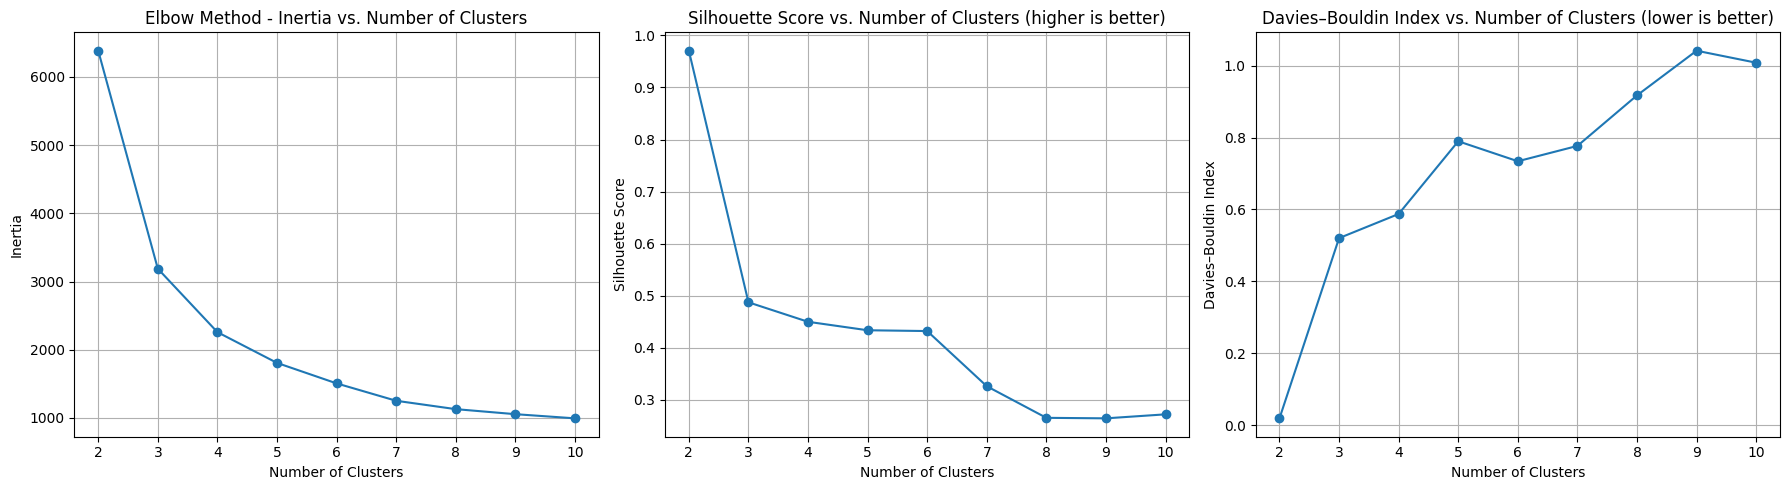

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-03-01  0.881809  0.843611  0.672251  0.919597  0.630393  0.828019   
2018-03-02  0.856435  0.845838  0.656388  0.901752  0.637014  0.837836   
2018-03-03  0.864419  0.848536  0.643403  0.900832  0.639041  0.840841   
2018-03-04  0.859497  0.843748  0.638683  0.896287  0.646483  0.851877   
2018-03-05  0.874607  0.849256  0.633385  0.905888  0.659168  0.870685   
...              ...       ...       ...       ...       ...       ...   
2018-05-27  0.650446  0.476062  0.296611  0.618466  0.431392  0.532940   
2018-05-28  0.656627  0.480555  0.296383  0.624582  0.430644  0.531832   
2018-05-29  0.706698  0.525173  0.347989  0.652008  0.490861  0.621121   
2018-05-30  0.738882  0.552670  0.275359  0.667918  0.454067  0.566563   
2018-05-31  0.676792  0.523151  0.259851  0.673142  0.437371  0.541806   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2018-03-01  0.441726  0.425709  

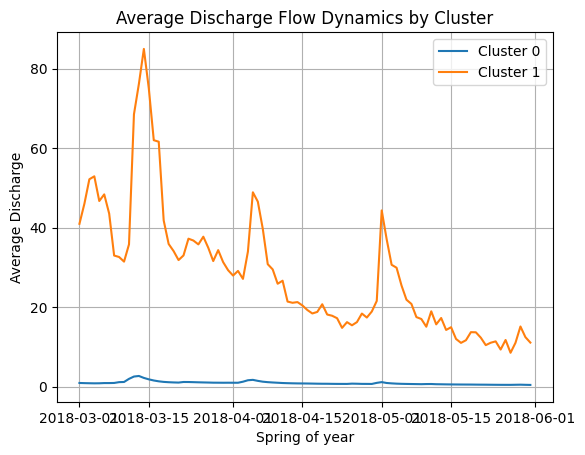

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2018-03-01  0.881809  0.843611  0.672251  0.919597  0.630393  0.828019   
2018-03-02  0.856435  0.845838  0.656388  0.901752  0.637014  0.837836   
2018-03-03  0.864419  0.848536  0.643403  0.900832  0.639041  0.840841   
2018-03-04  0.859497  0.843748  0.638683  0.896287  0.646483  0.851877   
2018-03-05  0.874607  0.849256  0.633385  0.905888  0.659168  0.870685   
...              ...       ...       ...       ...       ...       ...   
2018-05-27  0.650446  0.476062  0.296611  0.618466  0.431392  0.532940   
2018-05-28  0.656627  0.480555  0.296383  0.624582  0.430644  0.531832   
2018-05-29  0.706698  0.525173  0.347989  0.652008  0.490861  0.621121   
2018-05-30  0.738882  0.552670  0.275359  0.667918  0.454067  0.566563   
2018-05-31  0.676792  0.523151  0.259851  0.673142  0.437371  0.541806   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2018-03-01  0.441726  0.425709  1.308696  1.093101  ...  0.704183  0.598477   
2018-03-02  0.421266  0.405991  1.265748  1.065273  ...  0.568178  0.571977   
2018-03-03  0.406064  0.391340  1.219645  1.055694  ...  0.518587  0.438154   
2018-03-04  0.400161  0.385650  1.182787  1.055984  ...  0.512351  0.382754   
2018-03-05  0.404639  0.389966  1.160198  1.091849  ...  0.525842  0.385065   
...              ...       ...       ...       ...  ...       ...       ...   
2018-05-27  0.170390  0.164212  0.632671  0.644344  ...  0.276263  0.185515   
2018-05-28  0.173939  0.167631  0.613685  0.642431  ...  0.280870  0.248687   
2018-05-29  0.334190  0.322072  0.598946  0.631958  ...  0.308482  0.349476   
2018-05-30  0.196590  0.189462  0.583912  0.616608  ...  0.291740  0.257642   
2018-05-31  0.174191  0.167874  0.564945  0.602785  ...  0.263292  0.230530   

             7000333   8000001   9000001   9000015   9000172   9000173  \
2018-03-01  0.673671  1.195250  2.191712  2.080283  0.806306  2.768960   
2018-03-02  0.653491  1.110620  2.185712  2.074910  0.794445  2.995455   
2018-03-03  0.641404  0.989575  2.176111  2.066199  0.797814  3.097108   
2018-03-04  0.635810  0.870189  2.170650  2.061318  0.800608  3.019585   
2018-03-05  0.646666  0.861855  2.177057  2.067422  0.819337  3.133647   
...              ...       ...       ...       ...       ...       ...   
2018-05-27  0.365956  0.412416  1.014209  1.009875  0.595537  1.149976   
2018-05-28  0.365415  0.424939  0.997047  0.994100  0.595517  1.195570   
2018-05-29  0.401814  0.483049  0.997607  0.994808  0.661676  1.127372   
2018-05-30  0.364488  0.436885  1.008039  1.004696  0.611014  1.036461   
2018-05-31  0.338691  0.410449  0.971993  0.971358  0.595232  0.715228   

             9000293   9000451  
2018-03-01  0.784842  0.663490  
2018-03-02  0.698179  0.659035  
2018-03-03  0.648386  0.650639  
2018-03-04  0.651161  0.639531  
2018-03-05  0.645387  0.611148  
...              ...       ...  
2018-05-27  0.249373  0.195222  
2018-05-28  0.253293  0.207075  
2018-05-29  0.240209  0.214145  
2018-05-30  0.217075  0.204596  
2018-05-31  0.202709  0.181323  

[92 rows x 400 columns]

<Axes: >

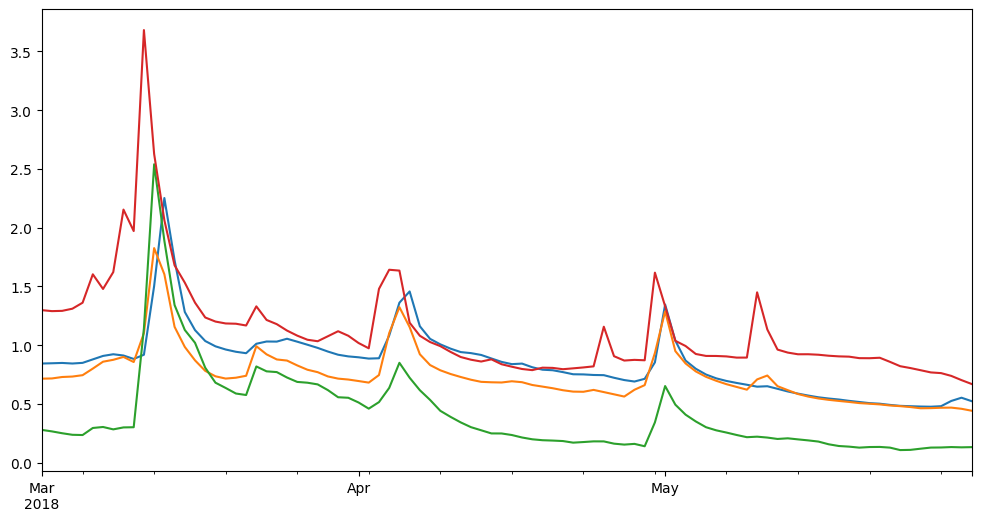

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

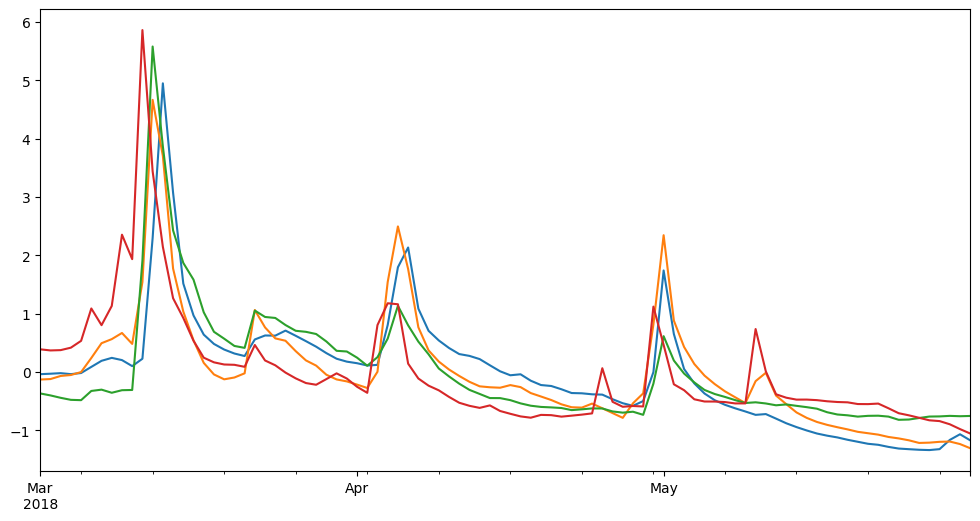

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

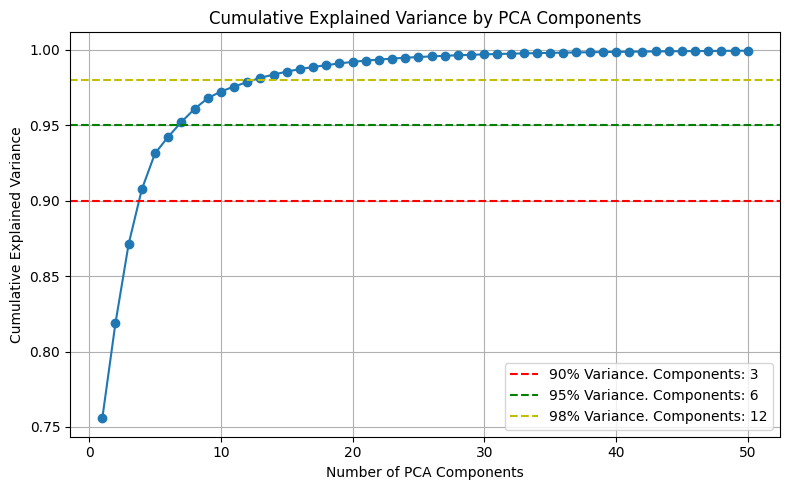

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  2.2746814 ,   0.4251135 ,   2.85262694, ...,  -1.49015974,
          1.91250141,   0.90298865],
       [  0.64004498,   0.20556606,   3.55554008, ...,  -0.34524324,
          0.13394477,  -0.14124939],
       [ -0.49535235,   0.40916746,   3.44664017, ...,   0.2127264 ,
         -0.61492075,  -0.44140866],
       ...,
       [-19.63469382,   0.71831123,  -7.20054234, ...,  -1.01641554,
          0.05699276,  -0.0581947 ],
       [-21.24861681,   0.38234387,  -6.93824255, ...,  -0.65265972,
         -0.07173082,   0.02600607],
       [-22.57738003,   0.4242144 ,  -7.05522065, ...,  -0.46647838,
         -0.35447872,  -0.10952629]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


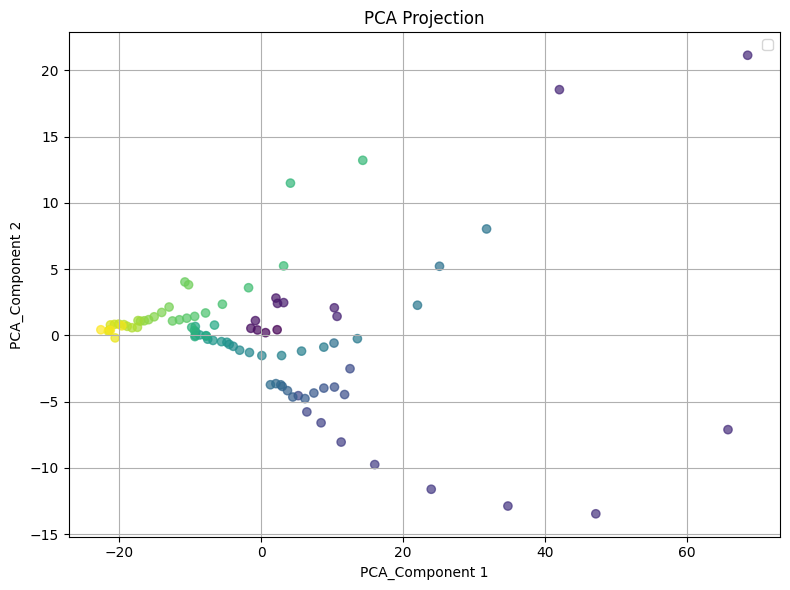

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


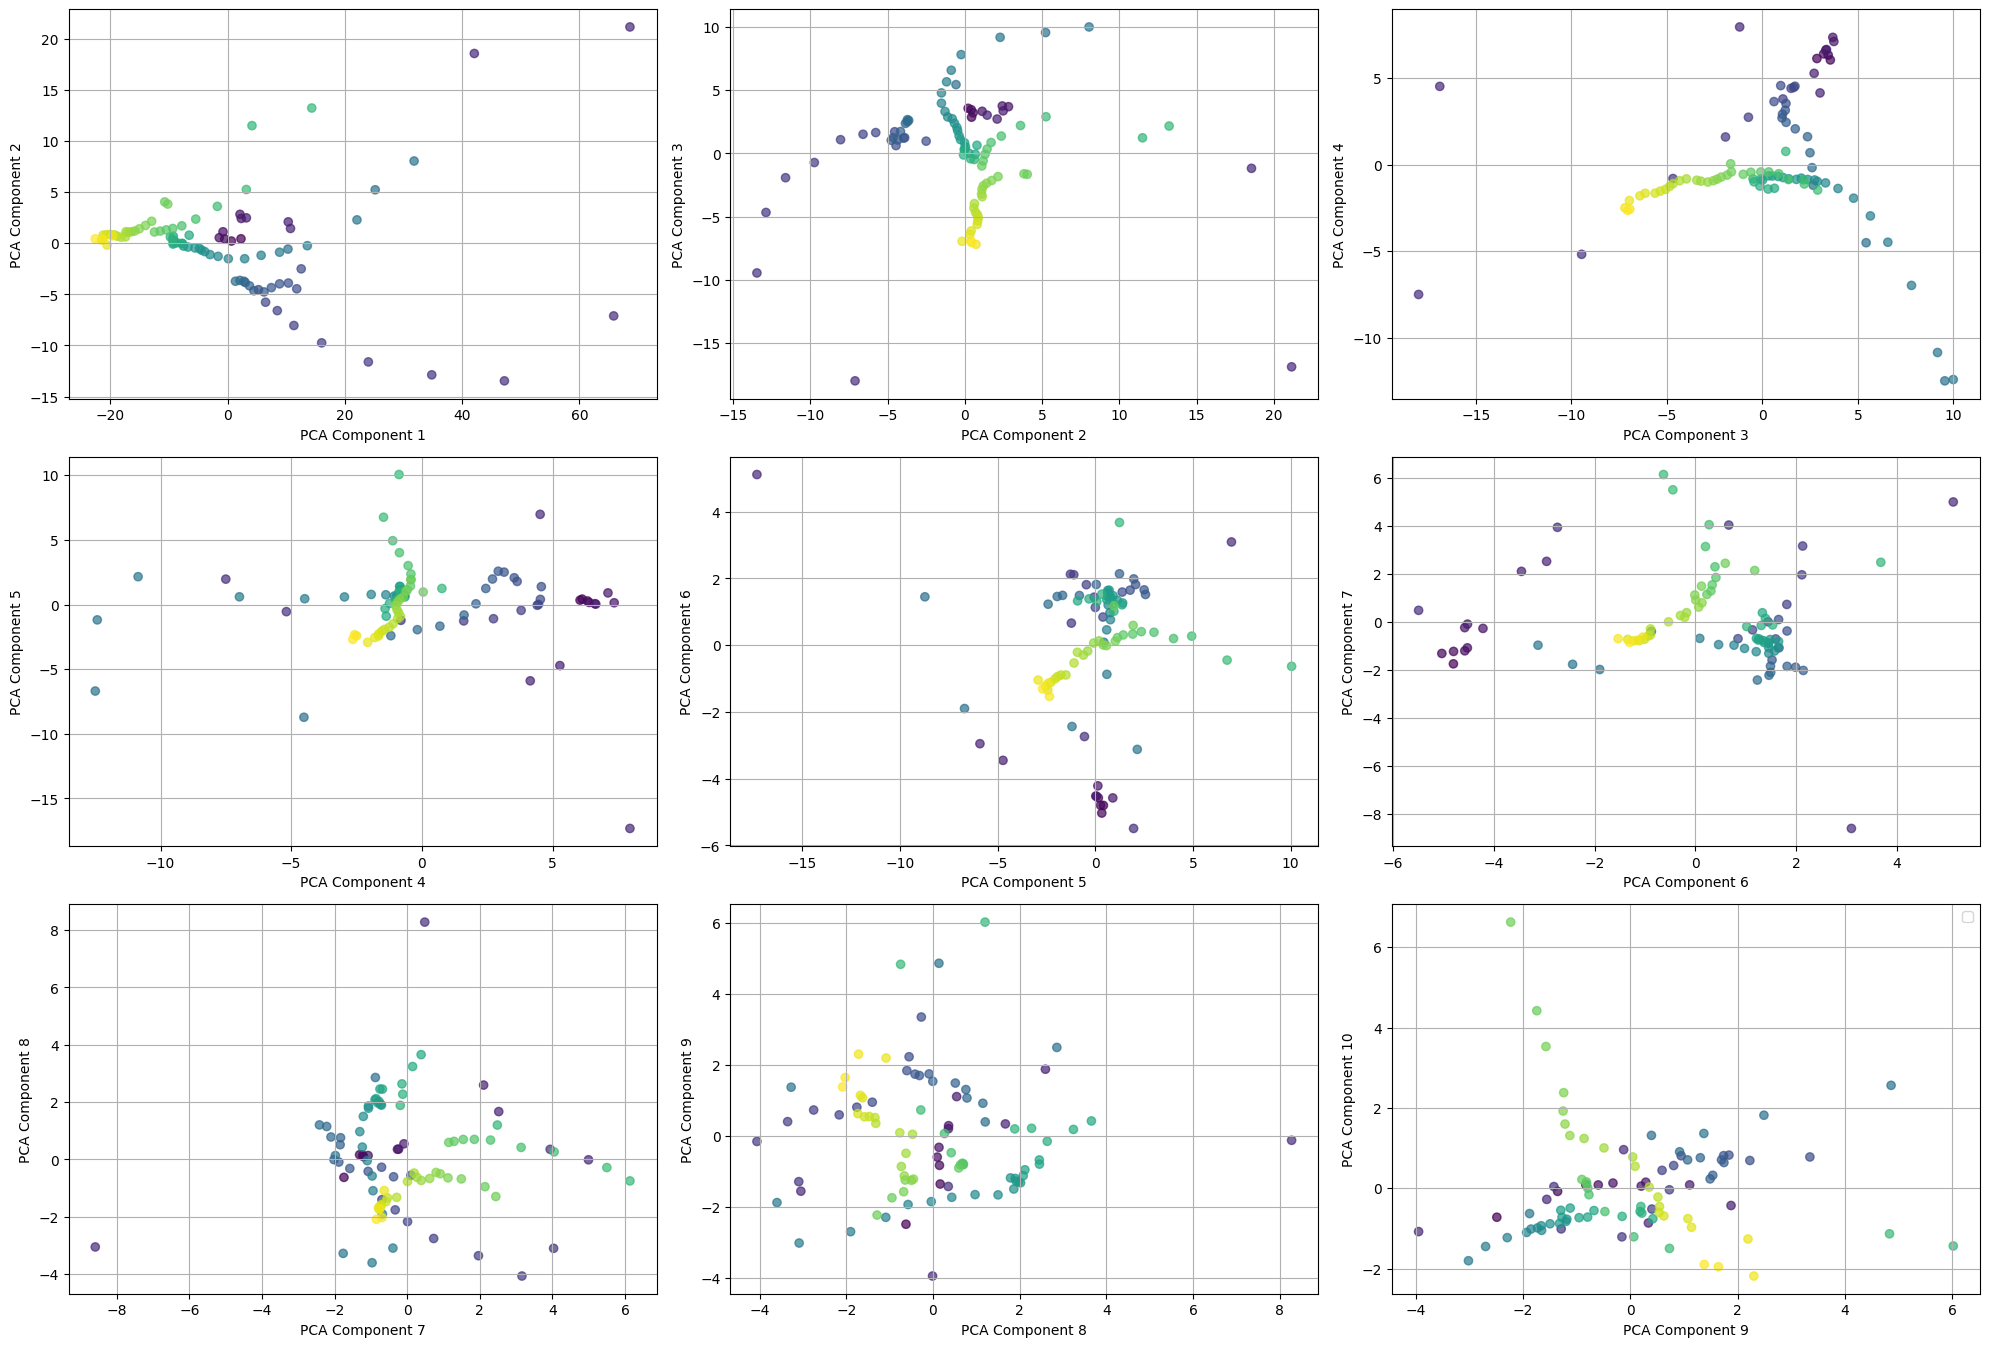

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.298
KMeans Davies-Bouldin Index is 1.135


<Axes: xlabel='k'>

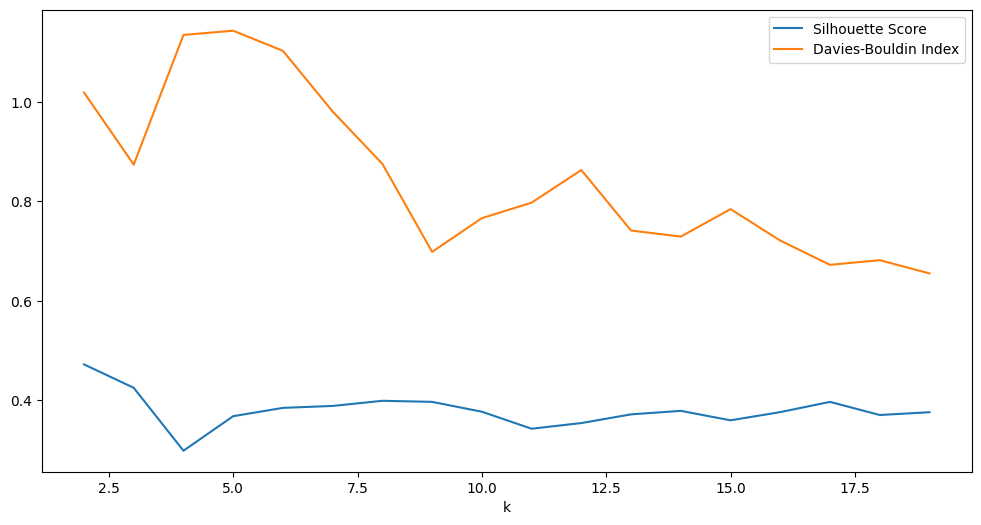

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         4     77         -0.266843   
3    1.27            3         5     73         -0.251190   
4    1.52            3         6     55         -0.035897   
5    1.78            3         6     51         -0.076577   
6    2.03            3         8     40          0.007558   
7    2.29            3         7     31          0.127770   
8    2.54            3         7     27          0.158914   
9    2.80            3         7     27          0.158914   
10   3.05            3         7     27          0.158914   
11   3.31            3         7     25          0.174516   
12   3.56            3         7     23          0.166246   
13   3.82            3         6     22          0.207148   
14   4.07            3         5     21          0.221560   
15   4.33            3         4     21          0.188590   
16   4.58            3         4     20          0.191430   
17   4.84            3         4     20          0.191430   
18   5.09            3         4     20          0.191430   
19   5.35            3         4     20          0.191430   
20   5.60            3         4     17          0.228932   
21   5.86            3         3     16          0.255861   
22   6.11            3         3     15          0.255041   
23   6.37            3         3     15          0.255041   
24   6.62            3         3     15          0.255041   
25   6.88            3         2     15          0.105554   
26   7.13            3         2     15          0.105554   
27   7.39            3         2     14          0.098004   
28   7.64            3         2     14          0.098004   
29   7.90            3         2     14          0.098004   
30   8.15            3         2     14          0.098004   
31   8.41            3         2     14          0.098004   
32   8.66            3         2     14          0.098004   
33   8.92            3         2     14          0.098004   
34   9.17            3         2     13          0.084840   
35   9.43            3         2     13          0.084840   
36   9.68            3         2     13          0.084840   
37   9.94            3         2     13          0.084840   
38  10.19            3         1     11               NaN   
39  10.45            3         1     11               NaN   
40  10.70            3         1     11               NaN   
41  10.96            3         1     10               NaN   
42  11.21            3         1     10               NaN   
43  11.47            3         1     10               NaN   
44  11.72            3         1     10               NaN   
45  11.98            3         1     10               NaN   
46  12.23            3         1     10               NaN   
47  12.49            3         1     10               NaN   
48  12.74            3         1      9               NaN   
49  13.00            3         1      8               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.464154  
3               1.505480  
4               1.086025  
5               1.459677  
6               1.576360  
7               1.366278  
8               1.318305  
9               1.318305  
10              1.318305  
11              1.282346  
12              1.301436  
13              1.353315  
14              1.395011  
15              1.487416  
16              1.428268  
17              1.428268  
18              1.428268  
19              1.428268  
20              1.152860  
21              1.139238  
22              1.082982  
23              1.082982  
24              1.082982  
25              1.114210  
26              1.114210  
27              1.140532  
28              1.140532  
29              1.140532  
30              1.140532  
31              1.140532  
32 

<Axes: xlabel='eps'>

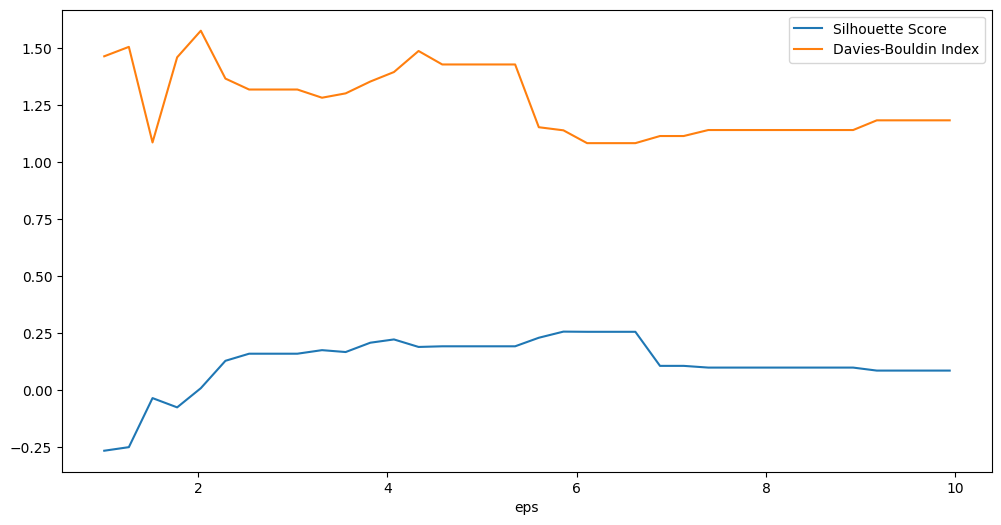

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

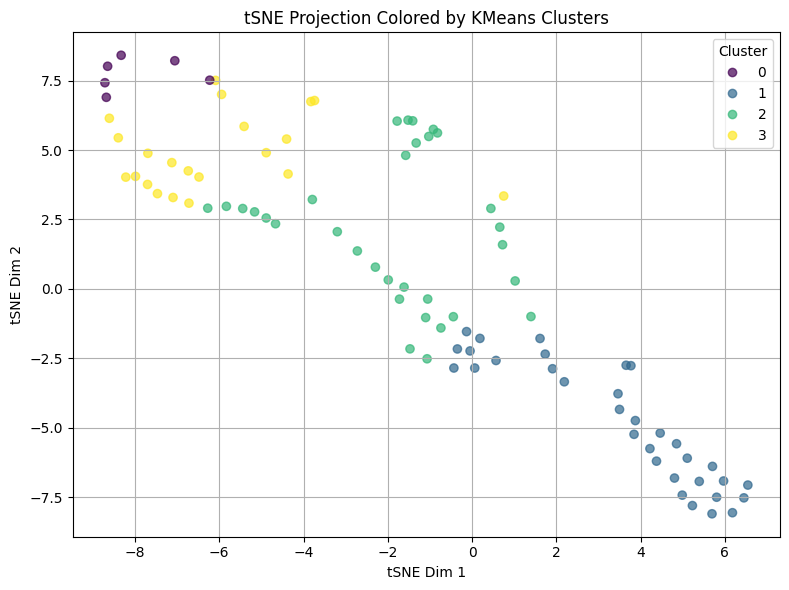

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    388          0.985988   
1    0.05            2         6    388          0.985988   
2    0.06            2         6    388          0.985988   
3    0.06            2         6    388          0.985988   
4    0.07            2         6    388          0.985988   
..    ...          ...       ...    ...               ...   
195  0.98            2        13     27         -0.187915   
196  0.99            2        14     25         -0.187814   
197  0.99            2        13     25         -0.192472   
198  1.00            2        12     24         -0.231321   
199  1.00            2        12     24         -0.231321   

     Davies-Bouldin Index  
0                0.016133  
1                0.016133  
2                0.016133  
3                0.016133  
4                0.016133  
..                    ...  
195              0.795823  
196              0.832921  
197              0.793128  
198              0.833098  
199              0.833098  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

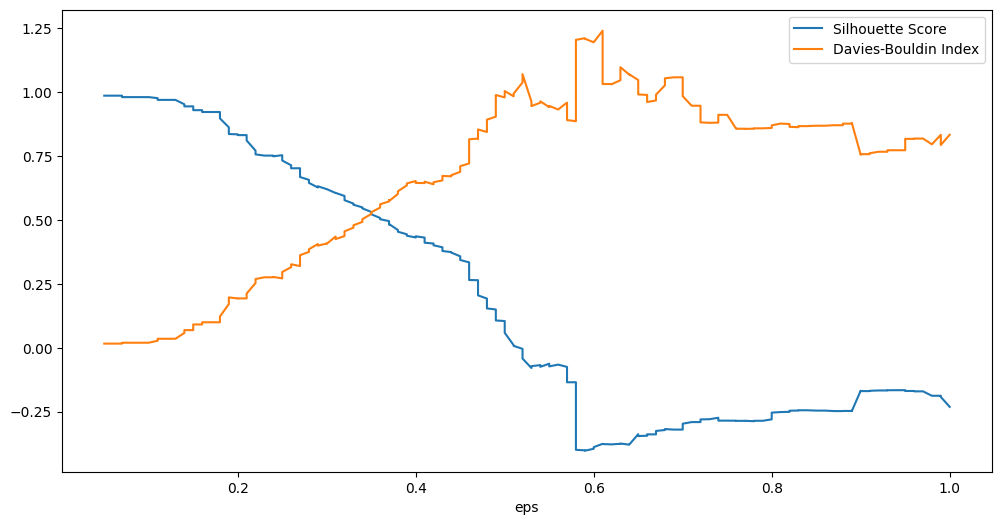

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2018
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2018-06-01 to 2018-08-31
Columns: 390 entries, 10000009 to 9000451
dtypes: float64(390)
memory usage: 281.0 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-06-01  0.662564  0.490174  0.266200  0.680198  0.430426  0.531509   
2018-06-02  0.654734  0.465185  0.253852  0.660020  0.432035  0.533893   
2018-06-03  0.651115  0.444862  0.235658  0.651367  0.430615  0.531788   
2018-06-04  0.654942  0.431302  0.238247  0.649337  0.453749  0.566092   
2018-06-05  0.652653  0.419039  0.235243  0.645671  0.432296  0.534281   
...              ...       ...       ...       ...       ...       ...   
2018-08-27  0.711269  0.525216  0.184363  0.708211  0.481862  0.607778   
2018-08-28  0.792889  0.556727  0.183207  0.756050  0.489322  0.618838   
2018-08-29  0.750654  0.554734  0.180624  0.734845  0.472084  0.593278   
2018-08-30  0.757554  0.564345  0.190240  0.736727  0.491219  0.621652   
2018-08-31  0.764400  0.562153  0.183261  0.730903  0.471465  0.592361   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-06-01  0.168166  0.162068  

          2018-06-01  2018-06-02  2018-06-03  2018-06-04  2018-06-05  \
10000009    0.346753    0.363174    0.440643    0.476487    0.406423   
10000010    0.060153    0.037226    0.027281    0.008575   -0.010195   
10000011   -0.312207   -0.326182   -0.391994   -0.395346   -0.337968   
10000014    0.376071    0.372263    0.441148    0.464761    0.393972   
10000016   -0.039179   -0.019780   -0.001271    0.055541    0.013448   
...              ...         ...         ...         ...         ...   
9000001     0.846595    0.872503    1.024128    1.063305    0.935878   
9000015     0.846864    0.874575    1.028123    1.068851    0.939143   
9000172     0.220003    0.224543    0.258907    0.273724    0.217598   
9000293    -0.437740   -0.440291   -0.506964   -0.532592   -0.455609   
9000451    -0.480887   -0.493934   -0.568461   -0.592985   -0.508053   

          2018-06-06  2018-06-07  2018-06-08  2018-06-09  2018-06-10  ...  \
10000009    0.376647    0.441428    0.507879    0.502484  

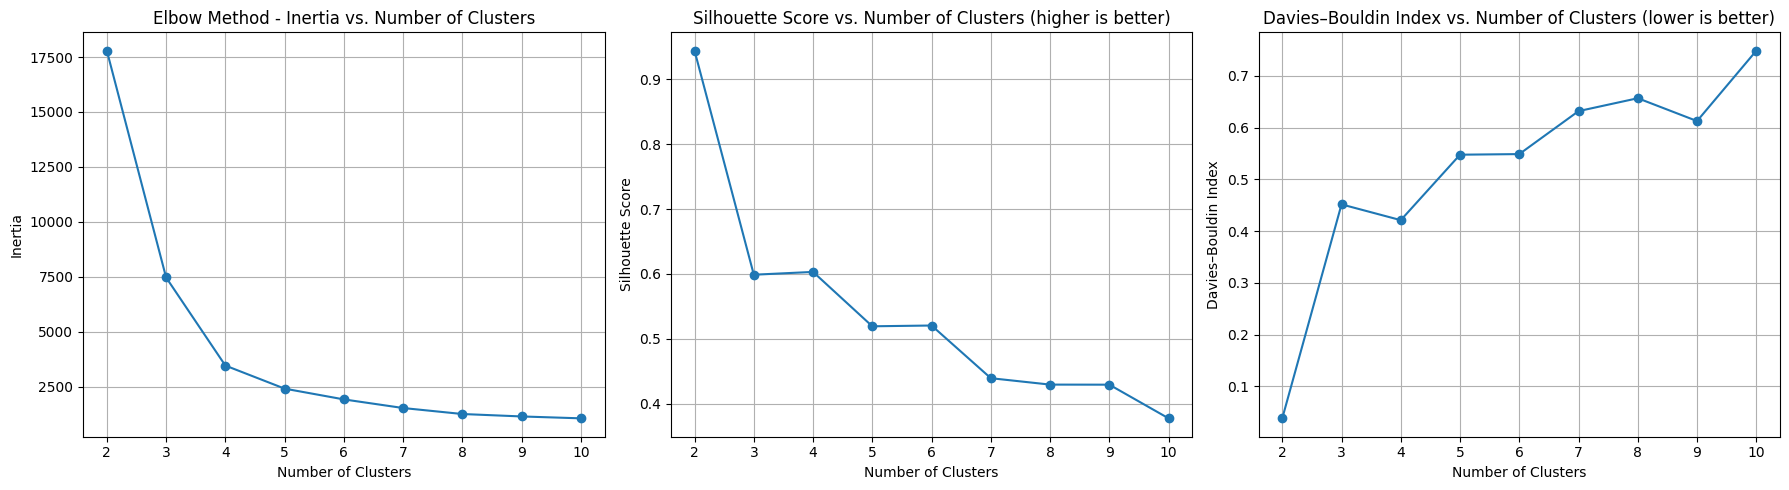

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        0
10000011        0
10000014        1
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-06-01  0.662564  0.490174  0.266200  0.680198  0.430426  0.531509   
2018-06-02  0.654734  0.465185  0.253852  0.660020  0.432035  0.533893   
2018-06-03  0.651115  0.444862  0.235658  0.651367  0.430615  0.531788   
2018-06-04  0.654942  0.431302  0.238247  0.649337  0.453749  0.566092   
2018-06-05  0.652653  0.419039  0.235243  0.645671  0.432296  0.534281   
...              ...       ...       ...       ...       ...       ...   
2018-08-27  0.711269  0.525216  0.184363  0.708211  0.481862  0.607778   
2018-08-28  0.792889  0.556727  0.183207  0.756050  0.489322  0.618838   
2018-08-29  0.750654  0.554734  0.180624  0.734845  0.472084  0.593278   
2018-08-30  0.757554  0.564345  0.190240  0.736727  0.491219  0.621652   
2018-08-31  0.764400  0.562153  0.183261  0.730903  0.471465  0.592361   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-06-01  0.168166  0.162068  

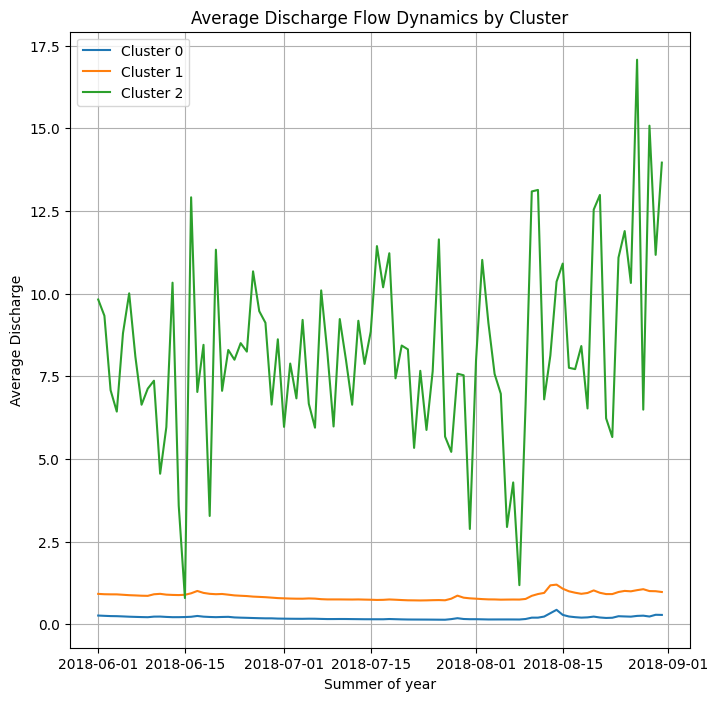

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2018-06-01  0.662564  0.490174  0.266200  0.680198  0.430426  0.531509   
2018-06-02  0.654734  0.465185  0.253852  0.660020  0.432035  0.533893   
2018-06-03  0.651115  0.444862  0.235658  0.651367  0.430615  0.531788   
2018-06-04  0.654942  0.431302  0.238247  0.649337  0.453749  0.566092   
2018-06-05  0.652653  0.419039  0.235243  0.645671  0.432296  0.534281   
...              ...       ...       ...       ...       ...       ...   
2018-08-27  0.711269  0.525216  0.184363  0.708211  0.481862  0.607778   
2018-08-28  0.792889  0.556727  0.183207  0.756050  0.489322  0.618838   
2018-08-29  0.750654  0.554734  0.180624  0.734845  0.472084  0.593278   
2018-08-30  0.757554  0.564345  0.190240  0.736727  0.491219  0.621652   
2018-08-31  0.764400  0.562153  0.183261  0.730903  0.471465  0.592361   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-06-01  0.168166  0.162068  0.551212  0.589924  ...  0.006176  0.249340   
2018-06-02  0.161959  0.156087  0.539299  0.581284  ...  0.005898  0.238653   
2018-06-03  0.155536  0.149896  0.518825  0.568249  ...  0.005216  0.229237   
2018-06-04  0.152196  0.146678  0.506160  0.562823  ...  0.006928  0.219072   
2018-06-05  0.145916  0.140625  0.496018  0.555310  ...  0.006185  0.210003   
...              ...       ...       ...       ...  ...       ...       ...   
2018-08-27  0.149073  0.143668  0.620569  0.891305  ...  0.018250  0.162706   
2018-08-28  0.165155  0.159166  0.650008  0.977583  ...  0.021265  0.176512   
2018-08-29  0.138097  0.133090  0.665899  0.861993  ...  0.024605  0.180463   
2018-08-30  0.145173  0.139909  0.722041  1.017046  ...  0.024012  0.188876   
2018-08-31  0.135891  0.130964  0.722761  0.910589  ...  0.023889  0.184352   

             7000099   7000333   8000001   9000001   9000015   9000172  \
2018-06-01  0.216004  0.327970  0.395073  0.963218  0.963380  0.586324   
2018-06-02  0.207707  0.316144  0.381154  0.950925  0.952131  0.574116   
2018-06-03  0.198856  0.303950  0.367649  0.942253  0.944247  0.560435   
2018-06-04  0.210283  0.295235  0.358568  0.935413  0.938064  0.558030   
2018-06-05  0.185520  0.278875  0.345631  0.949539  0.951370  0.546771   
...              ...       ...       ...       ...       ...       ...   
2018-08-27  0.051148  0.292550  0.302643  0.929657  0.945600  0.727981   
2018-08-28  0.093430  0.328222  0.324277  0.937538  0.952885  0.770794   
2018-08-29  0.034829  0.325294  0.319912  0.875159  0.894172  0.763768   
2018-08-30  0.052282  0.334664  0.320848  0.857229  0.877180  0.766352   
2018-08-31  0.033191  0.327062  0.319532  0.787730  0.811837  0.726853   

             9000293   9000451  
2018-06-01  0.190692  0.164739  
2018-06-02  0.187494  0.156299  
2018-06-03  0.178292  0.147607  
2018-06-04  0.172650  0.143784  
2018-06-05  0.169277  0.139870  
...              ...       ...  
2018-08-27  0.106807  0.236412  
2018-08-28  0.084343  0.252302  
2018-08-29  0.333177  0.264493  
2018-08-30  0.577186  0.303973  
2018-08-31  0.223852  0.298999  

[92 rows x 390 columns]

<Axes: >

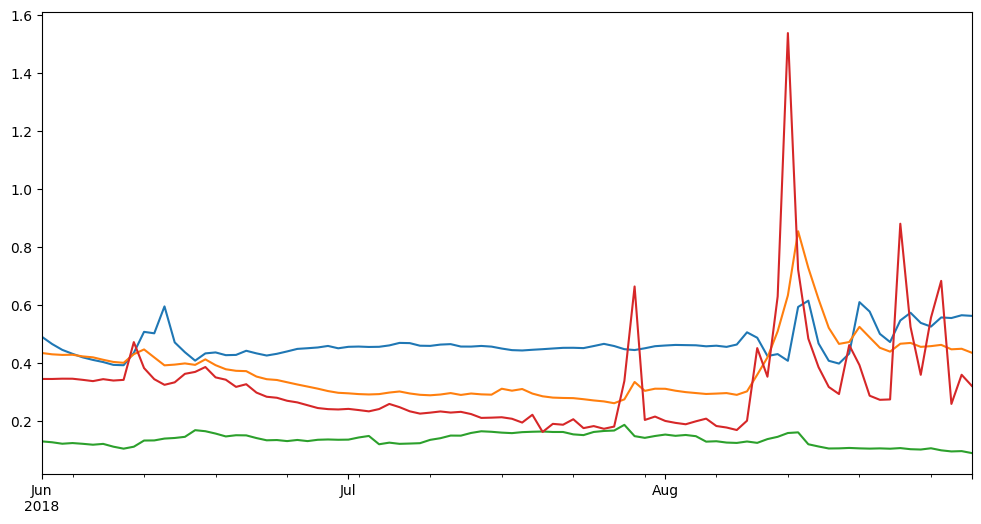

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

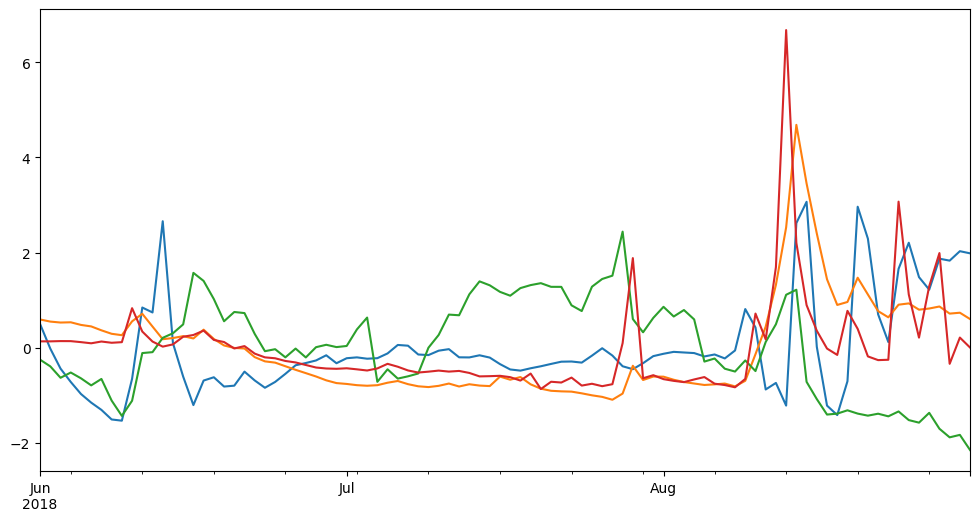

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

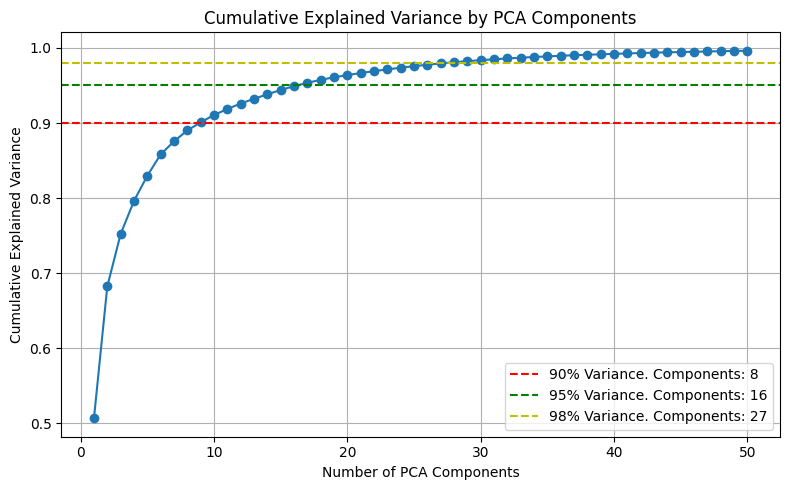

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 23.5497985 ,  17.62107243,  -1.20239173, ...,  -0.88284294,
         -0.05061257,  -2.20672353],
       [ 20.65234659,  16.49473972,  -1.1345487 , ...,  -0.52027227,
          0.12914751,  -0.15990214],
       [ 18.69691608,  15.80784499,  -0.91856758, ...,  -0.04378806,
          0.35904014,   0.33500638],
       ...,
       [ 11.10387622,  -9.66962025, -11.87179267, ...,  -1.56564826,
          0.80536385,   0.55882348],
       [ 22.83351836,  -7.56244292,  -8.02033522, ...,   0.44563044,
          0.35512547,  -0.90907197],
       [ 23.99740942,  -4.99184602,  -9.18813216, ...,  -0.0930949 ,
         -0.49254813,   0.33493283]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


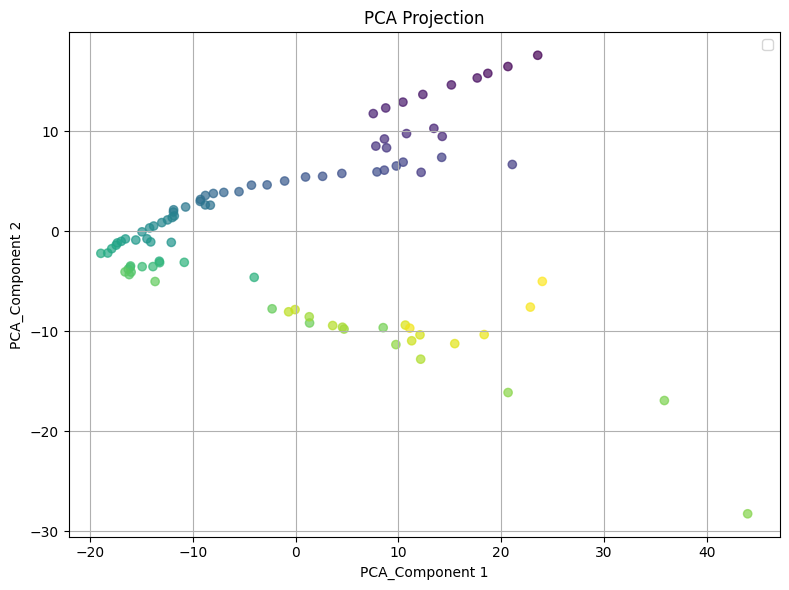

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


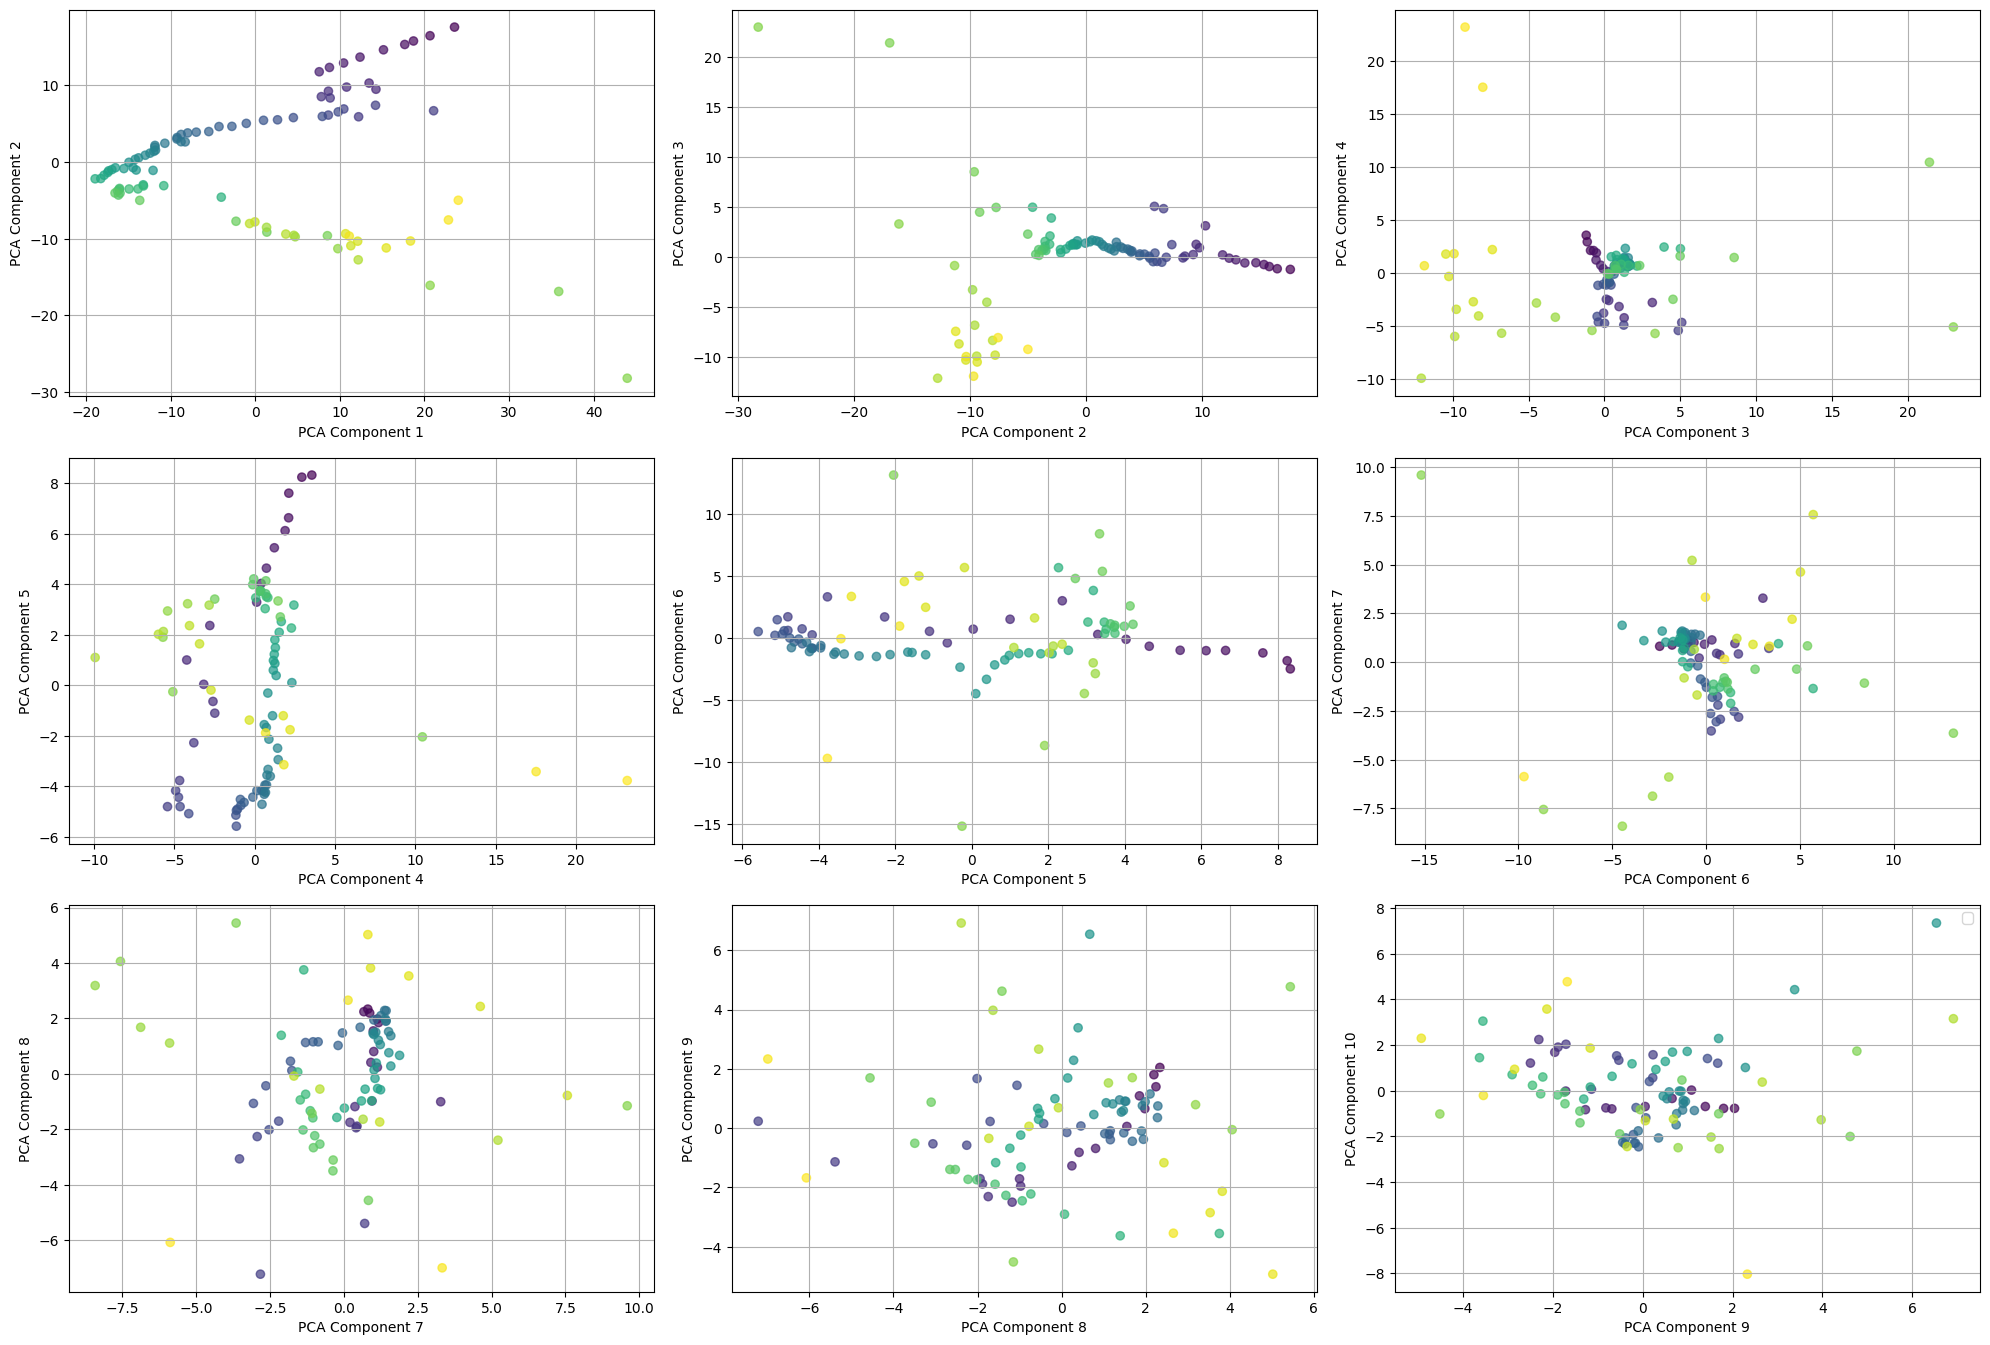

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.448
KMeans Davies-Bouldin Index is 1.212


<Axes: xlabel='k'>

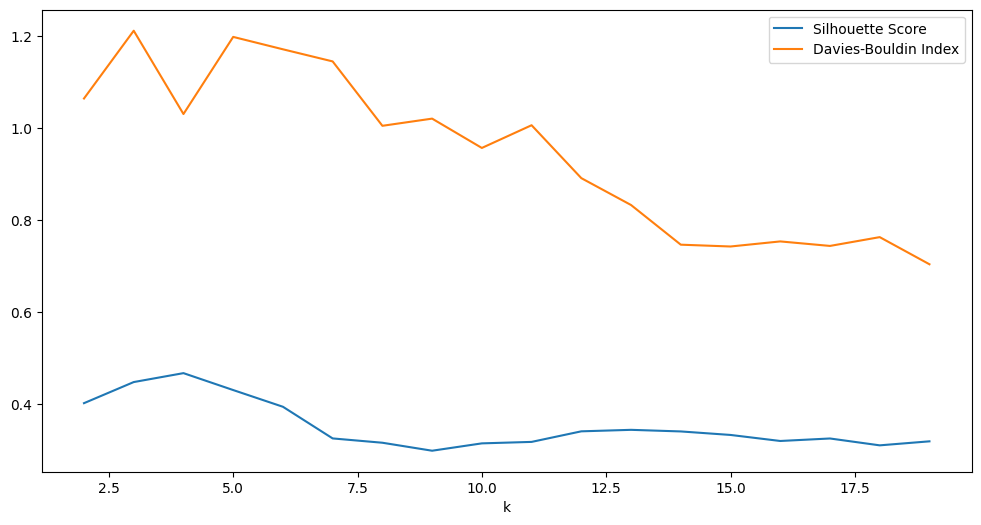

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     89               NaN   
3    1.27            3         2     85         -0.160583   
4    1.52            3         3     79         -0.155031   
5    1.78            3         4     72         -0.064027   
6    2.03            3         5     67         -0.013400   
7    2.29            3         6     59          0.014315   
8    2.54            3         6     52          0.016584   
9    2.80            3         4     49          0.067306   
10   3.05            3         5     46          0.099356   
11   3.31            3         4     45          0.073529   
12   3.56            3         4     43          0.065123   
13   3.82            3         3     42          0.099282   
14   4.07            3         3     40          0.117715   
15   4.33            3         3     40          0.117715   
16   4.58            3         3     39          0.139805   
17   4.84            3         4     36          0.076461   
18   5.09            3         4     36          0.076461   
19   5.35            3         4     32          0.106691   
20   5.60            3         4     29          0.249223   
21   5.86            3         4     29          0.249223   
22   6.11            3         4     29          0.249223   
23   6.37            3         3     29          0.239385   
24   6.62            3         3     27          0.251710   
25   6.88            3         3     23          0.166148   
26   7.13            3         3     22          0.177096   
27   7.39            3         3     22          0.177096   
28   7.64            3         3     19          0.119800   
29   7.90            3         3     16          0.151983   
30   8.15            3         3     16          0.151983   
31   8.41            3         3     13          0.189779   
32   8.66            3         3     13          0.189779   
33   8.92            3         3     13          0.189779   
34   9.17            3         3     13          0.189779   
35   9.43            3         3     13          0.189779   
36   9.68            3         3     12          0.194904   
37   9.94            3         3     12          0.194904   
38  10.19            3         3     11          0.198307   
39  10.45            3         3     11          0.198307   
40  10.70            3         3     10          0.197118   
41  10.96            3         3     10          0.197118   
42  11.21            3         3     10          0.197118   
43  11.47            3         3     10          0.197118   
44  11.72            3         3     10          0.197118   
45  11.98            3         3     10          0.197118   
46  12.23            3         3     10          0.197118   
47  12.49            3         3     10          0.197118   
48  12.74            3         3     10          0.197118   
49  13.00            3         3      9          0.191505   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.138454  
4               1.286136  
5               1.161349  
6               1.085129  
7               1.138529  
8               1.094533  
9               1.147596  
10              1.069899  
11              1.113416  
12              1.132392  
13              1.199348  
14              1.199293  
15              1.199293  
16              1.172137  
17              1.243132  
18              1.243132  
19              1.254333  
20              1.287732  
21              1.287732  
22              1.287732  
23              1.269503  
24              1.244464  
25              1.410983  
26              1.340449  
27              1.340449  
28              1.542332  
29              1.807805  
30              1.807805  
31              1.791781  
32 

<Axes: xlabel='eps'>

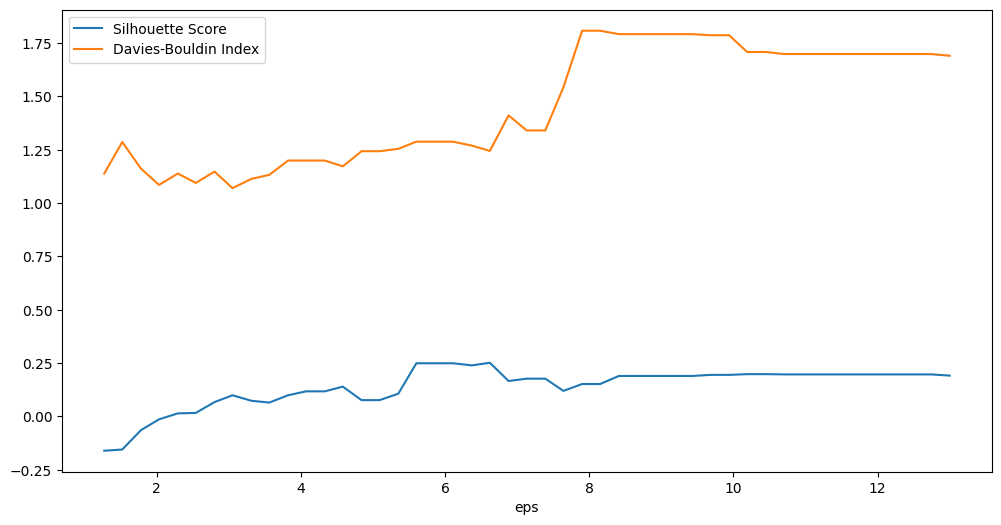

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

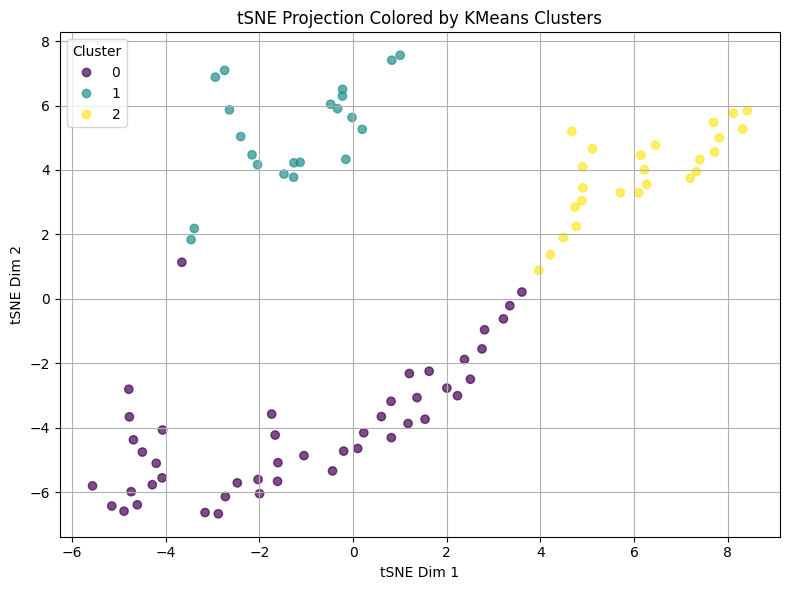

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         9    370          0.912222   
1    0.05            2        10    367          0.875543   
2    0.06            2        11    364          0.842355   
3    0.06            2        12    361          0.805907   
4    0.07            2        12    361          0.805907   
..    ...          ...       ...    ...               ...   
195  0.98            2         9     42         -0.271938   
196  0.99            2         9     42         -0.271938   
197  0.99            2         8     42         -0.326859   
198  1.00            2         8     42         -0.326859   
199  1.00            2         8     42         -0.326859   

     Davies-Bouldin Index  
0                0.082156  
1                0.110748  
2                0.144245  
3                0.178878  
4                0.178878  
..                    ...  
195              0.601518  
196              0.601518  
197              0.586773  
198              0.586773  
199              0.586773  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

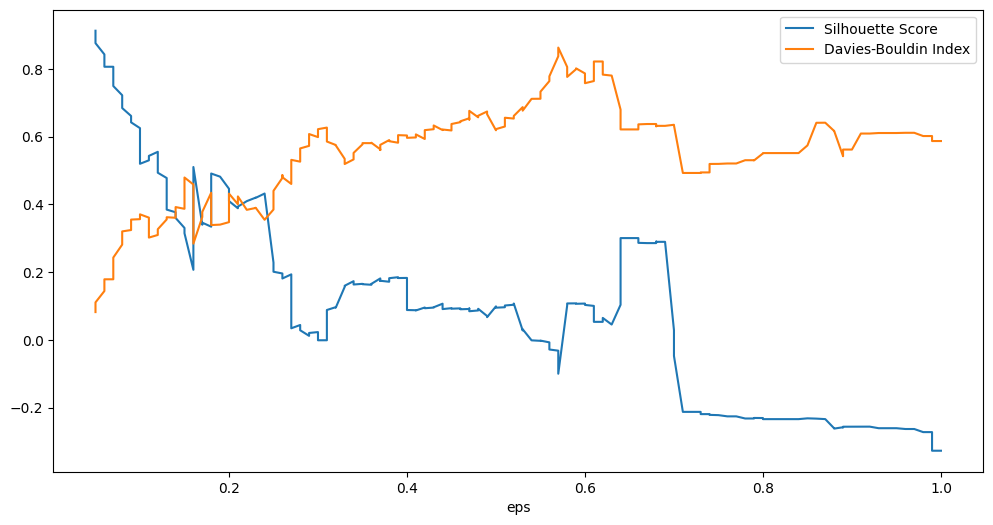

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2018
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2018-09-01 to 2018-11-30
Columns: 392 entries, 10000009 to 9000451
dtypes: float64(392)
memory usage: 279.4 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-09-01  0.743054  0.553310  0.181030  0.716827  0.462971  0.579766   
2018-09-02  0.725607  0.541115  0.184037  0.699646  0.435895  0.539618   
2018-09-03  0.718646  0.532554  0.188433  0.694222  0.445284  0.553539   
2018-09-04  0.714856  0.530225  0.189725  0.695509  0.443088  0.550283   
2018-09-05  0.707664  0.522891  0.189227  0.694591  0.453017  0.565006   
...              ...       ...       ...       ...       ...       ...   
2018-11-26  0.760233  0.482721  0.229190  0.850961  0.470925  0.591560   
2018-11-27  0.748927  0.476279  0.222563  0.842844  0.467561  0.586571   
2018-11-28  0.736551  0.467748  0.218333  0.832448  0.451504  0.562763   
2018-11-29  0.862179  0.602797  0.317463  0.956662  0.602780  0.787074   
2018-11-30  1.160650  0.731018  0.542487  1.158786  0.644747  0.849302   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-09-01  0.130691  0.125952  

          2018-09-01  2018-09-02  2018-09-03  2018-09-04  2018-09-05  \
10000009    0.403063    0.412008    0.609963    0.577834    0.602585   
10000010    0.142257    0.155819    0.246530    0.234009    0.242463   
10000011   -0.369448   -0.340022   -0.425528   -0.400080   -0.407848   
10000014    0.367014    0.375957    0.562263    0.541806    0.577105   
10000016    0.018085    0.009711    0.076093    0.071739    0.106279   
...              ...         ...         ...         ...         ...   
9000001     0.362957    0.338652    0.462921    0.392628    0.385567   
9000015     0.402258    0.381748    0.526845    0.456552    0.454400   
9000172     0.347527    0.353796    0.529943    0.574821    0.576897   
9000293    -0.432036   -0.458533   -0.618181   -0.611819   -0.653428   
9000451    -0.212400   -0.207978   -0.276792   -0.279005   -0.300287   

          2018-09-06  2018-09-07  2018-09-08  2018-09-09  2018-09-10  ...  \
10000009    0.519282    0.080807    0.305551    0.417475  

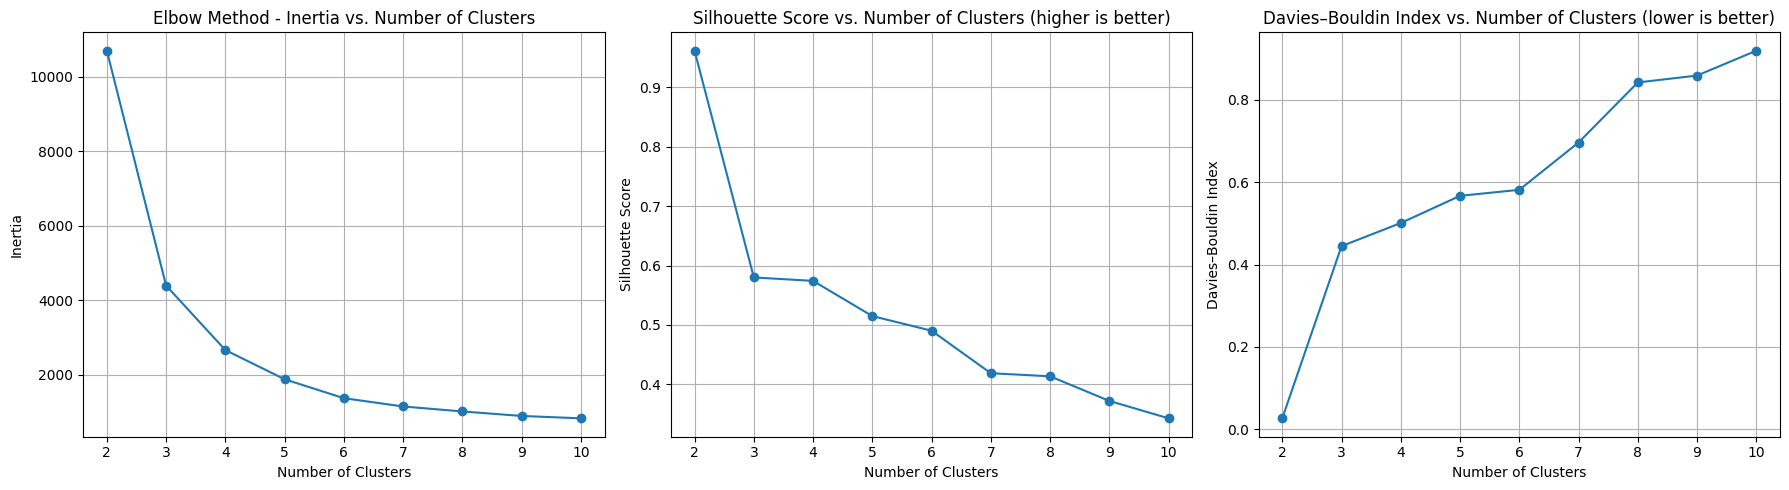

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        1
10000011        1
10000014        0
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-09-01  0.743054  0.553310  0.181030  0.716827  0.462971  0.579766   
2018-09-02  0.725607  0.541115  0.184037  0.699646  0.435895  0.539618   
2018-09-03  0.718646  0.532554  0.188433  0.694222  0.445284  0.553539   
2018-09-04  0.714856  0.530225  0.189725  0.695509  0.443088  0.550283   
2018-09-05  0.707664  0.522891  0.189227  0.694591  0.453017  0.565006   
...              ...       ...       ...       ...       ...       ...   
2018-11-26  0.760233  0.482721  0.229190  0.850961  0.470925  0.591560   
2018-11-27  0.748927  0.476279  0.222563  0.842844  0.467561  0.586571   
2018-11-28  0.736551  0.467748  0.218333  0.832448  0.451504  0.562763   
2018-11-29  0.862179  0.602797  0.317463  0.956662  0.602780  0.787074   
2018-11-30  1.160650  0.731018  0.542487  1.158786  0.644747  0.849302   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-09-01  0.130691  0.125952  

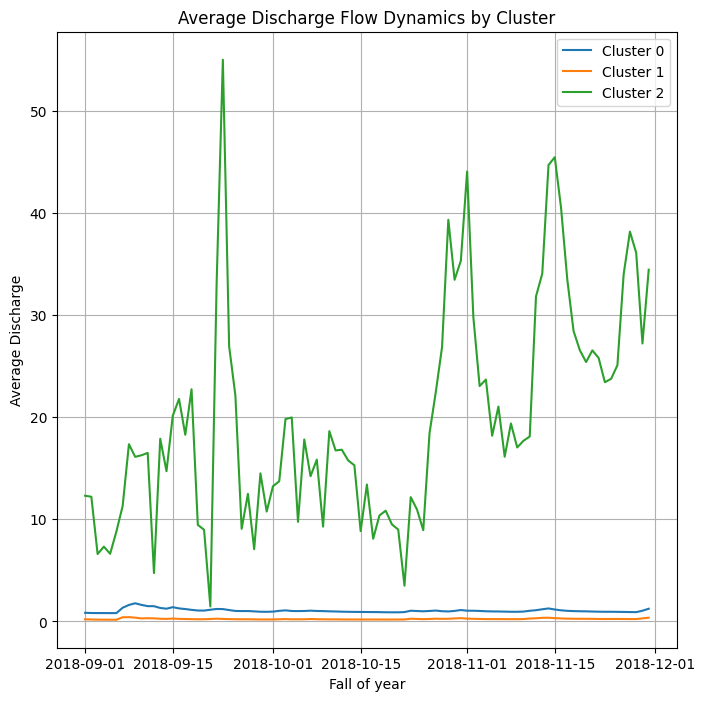

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2018-09-01  0.743054  0.553310  0.181030  0.716827  0.462971  0.579766   
2018-09-02  0.725607  0.541115  0.184037  0.699646  0.435895  0.539618   
2018-09-03  0.718646  0.532554  0.188433  0.694222  0.445284  0.553539   
2018-09-04  0.714856  0.530225  0.189725  0.695509  0.443088  0.550283   
2018-09-05  0.707664  0.522891  0.189227  0.694591  0.453017  0.565006   
...              ...       ...       ...       ...       ...       ...   
2018-11-26  0.760233  0.482721  0.229190  0.850961  0.470925  0.591560   
2018-11-27  0.748927  0.476279  0.222563  0.842844  0.467561  0.586571   
2018-11-28  0.736551  0.467748  0.218333  0.832448  0.451504  0.562763   
2018-11-29  0.862179  0.602797  0.317463  0.956662  0.602780  0.787074   
2018-11-30  1.160650  0.731018  0.542487  1.158786  0.644747  0.849302   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-09-01  0.130691  0.125952  0.716757  0.820960  ...  0.021288  0.173272   
2018-09-02  0.127022  0.122416  0.703448  0.769714  ...  0.029629  0.161603   
2018-09-03  0.126527  0.121939  0.696277  0.748355  ...  0.024670  0.156237   
2018-09-04  0.122820  0.118367  0.690718  0.744167  ...  0.023415  0.154634   
2018-09-05  0.122800  0.118347  0.679438  0.742391  ...  0.023580  0.153389   
...              ...       ...       ...       ...  ...       ...       ...   
2018-11-26  0.323718  0.311980  1.053115  0.779929  ...  0.029540  0.441272   
2018-11-27  0.307357  0.296212  1.029412  0.763661  ...  0.025171  0.414611   
2018-11-28  0.290485  0.279952  1.000400  0.755704  ...  0.022128  0.387179   
2018-11-29  0.419551  0.404337  0.979985  0.814812  ...  0.023185  0.562009   
2018-11-30  0.892828  0.860453  1.002606  1.039127  ...  0.026850  1.159532   

             7000099   7000333   8000001   9000001   9000015   9000172  \
2018-09-01  0.032521  0.311119  0.309522  0.713876  0.742468  0.702649   
2018-09-02  0.031964  0.297149  0.304320  0.672781  0.703816  0.683687   
2018-09-03  0.032648  0.288963  0.298286  0.643355  0.676087  0.677673   
2018-09-04  0.036337  0.290373  0.295853  0.615402  0.649728  0.713238   
2018-09-05  0.043906  0.292573  0.293966  0.596316  0.631632  0.694484   
...              ...       ...       ...       ...       ...       ...   
2018-11-26  0.257798  0.565515  0.564864  1.079156  1.066159  0.850771   
2018-11-27  0.249136  0.546541  0.542832  1.076288  1.063376  0.803637   
2018-11-28  0.241990  0.528668  0.520957  1.089409  1.075532  0.792155   
2018-11-29  0.419640  0.821674  0.684738  1.158560  1.140064  1.041921   
2018-11-30  0.774601  1.129856  1.220982  1.300974  1.273163  1.322516   

             9000293   9000451  
2018-09-01  0.135495  0.295287  
2018-09-02  0.098692  0.279128  
2018-09-03  0.089788  0.264592  
2018-09-04  0.076024  0.254741  
2018-09-05  0.063224  0.244415  
...              ...       ...  
2018-11-26  0.648011  0.490699  
2018-11-27  0.597269  0.475803  
2018-11-28  0.560260  0.456708  
2018-11-29  0.767336  0.552633  
2018-11-30  0.902936  0.728654  

[91 rows x 392 columns]

<Axes: >

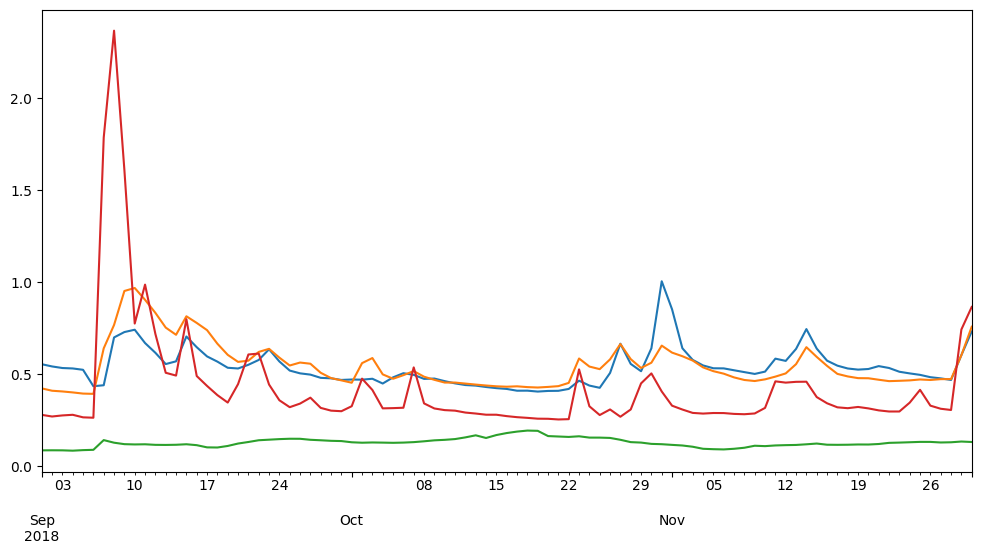

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

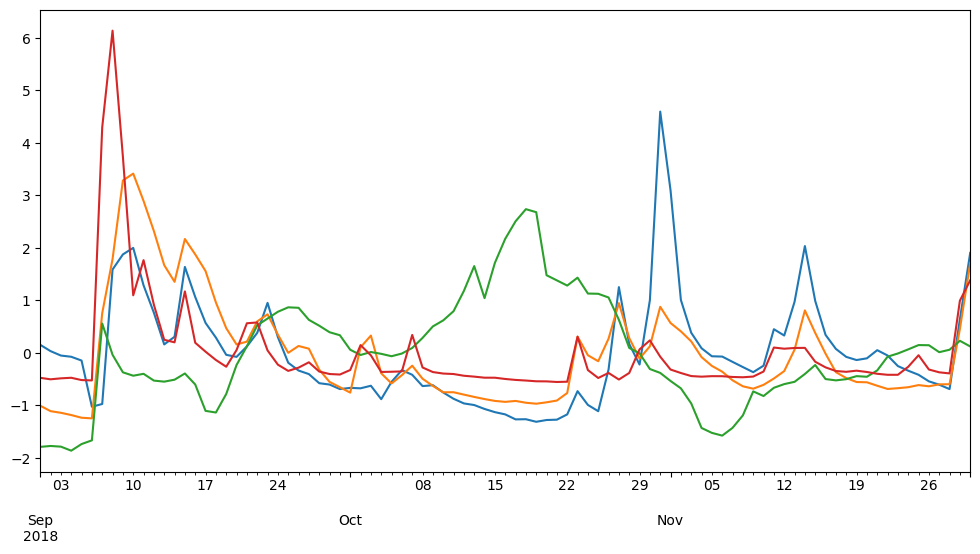

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

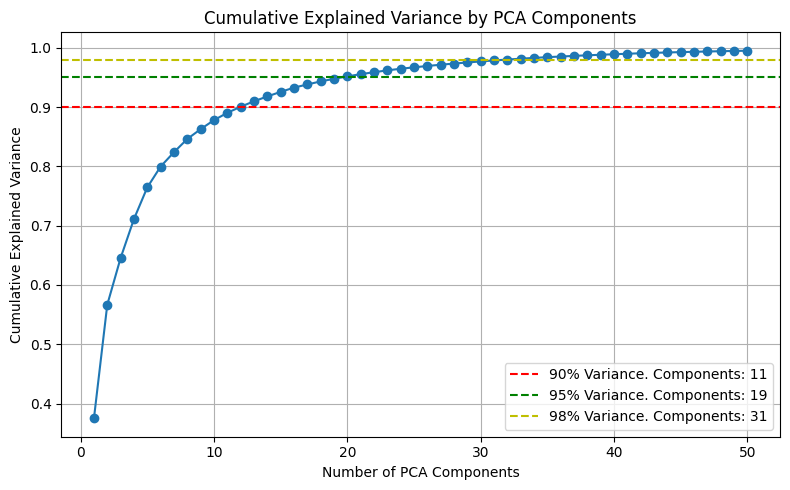

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -8.66511367,   1.34855311, -17.13920606, ...,   2.27119841,
          1.04036923,   0.64044534],
       [-12.50429826,  -3.2478802 , -12.99142152, ...,   0.75709049,
          0.08797225,   0.04731248],
       [-13.86300075,  -5.46465597, -10.95351653, ...,  -0.8662229 ,
         -0.98804845,   0.2845312 ],
       ...,
       [ -5.79348998,   6.59630703,   0.42548346, ...,  -0.70683876,
          1.69305225,  -0.32654293],
       [  7.69056998,  14.21921896,  -3.25553917, ...,   1.32810108,
         -0.58300283,   0.71057171],
       [ 21.42048399,  22.68174665,   0.8763124 , ...,   2.31346127,
         -2.02758862,   0.5142704 ]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


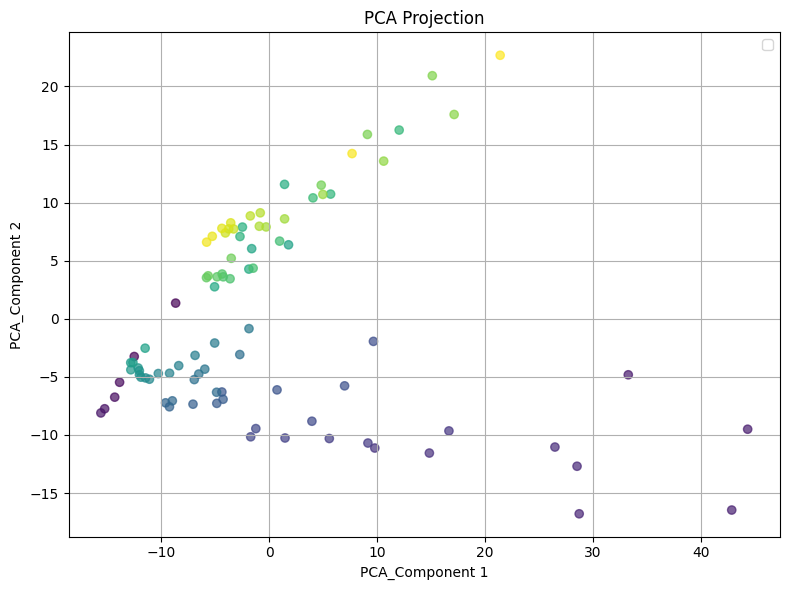

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


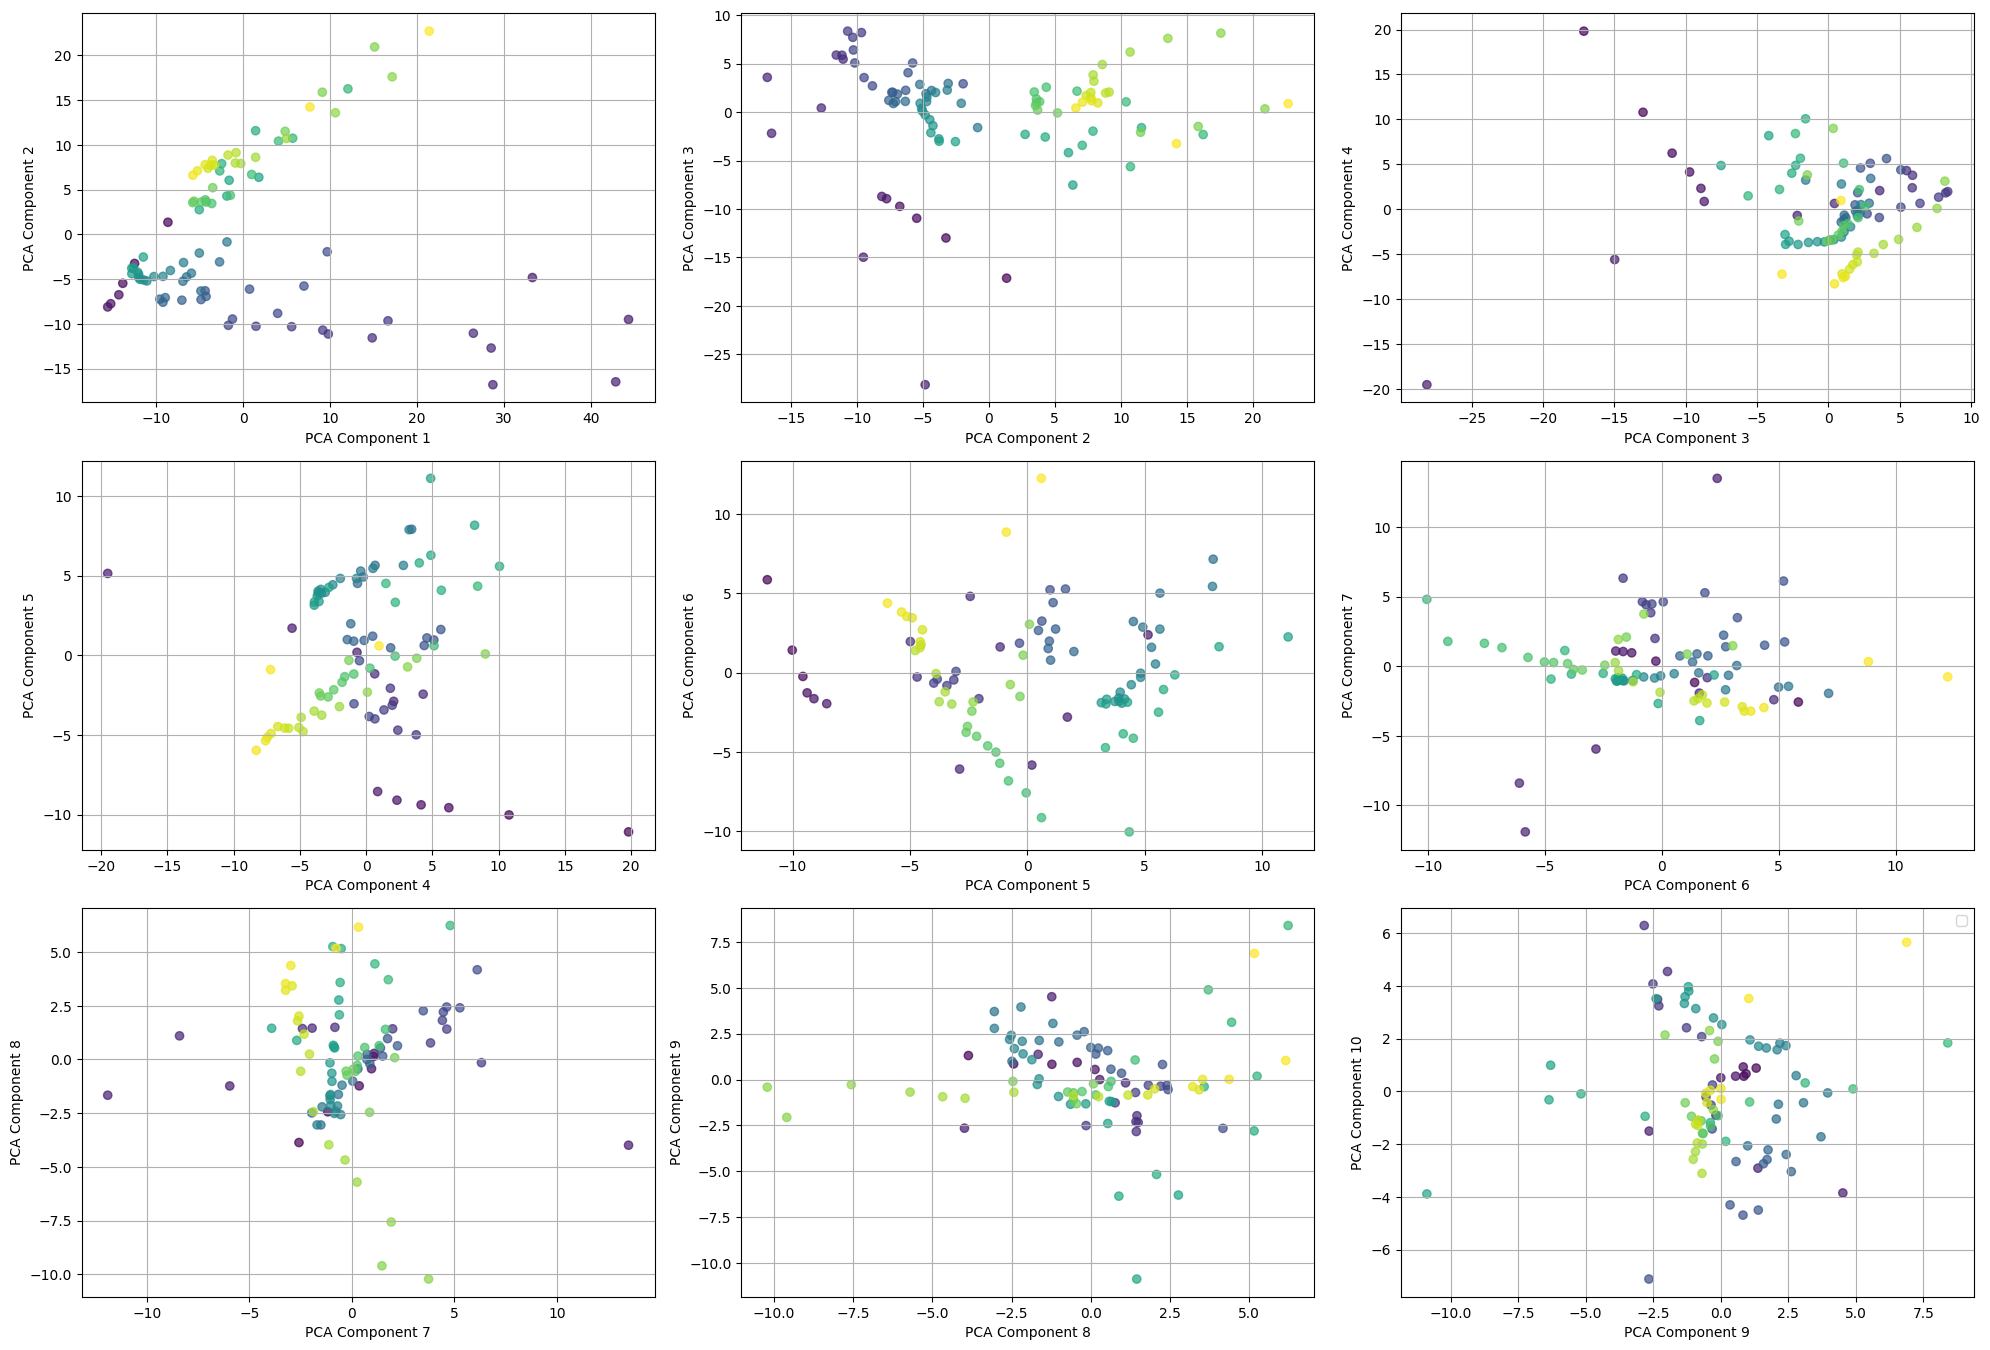

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.265
KMeans Davies-Bouldin Index is 1.342


<Axes: xlabel='k'>

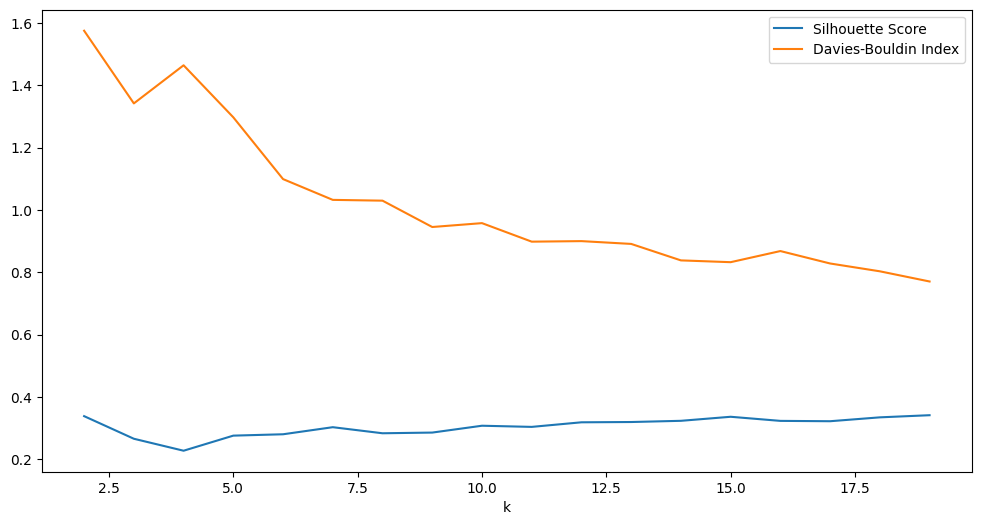

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         0     91               NaN   
3    1.27            3         0     91               NaN   
4    1.52            3         0     91               NaN   
5    1.78            3         4     78         -0.230085   
6    2.03            3         5     67         -0.105505   
7    2.29            3         5     66         -0.094967   
8    2.54            3         4     64         -0.047954   
9    2.80            3         4     64         -0.047954   
10   3.05            3         5     56          0.026150   
11   3.31            3         5     54          0.045259   
12   3.56            3         5     50          0.095795   
13   3.82            3         5     48          0.102243   
14   4.07            3         5     47          0.104158   
15   4.33            3         5     47          0.104158   
16   4.58            3         6     43          0.113679   
17   4.84            3         6     40          0.115546   
18   5.09            3         6     37          0.119049   
19   5.35            3         6     36          0.134301   
20   5.60            3         6     34          0.145933   
21   5.86            3         5     34          0.176896   
22   6.11            3         5     34          0.176896   
23   6.37            3         5     33          0.187684   
24   6.62            3         5     33          0.187684   
25   6.88            3         5     33          0.187684   
26   7.13            3         5     31          0.195850   
27   7.39            3         5     29          0.212711   
28   7.64            3         5     29          0.212711   
29   7.90            3         5     29          0.212711   
30   8.15            3         5     28          0.222322   
31   8.41            3         5     27          0.218322   
32   8.66            3         5     27          0.218322   
33   8.92            3         5     27          0.218322   
34   9.17            3         4     27          0.176516   
35   9.43            3         4     25          0.182520   
36   9.68            3         4     21          0.232392   
37   9.94            3         4     21          0.232392   
38  10.19            3         4     20          0.226886   
39  10.45            3         4     19          0.223913   
40  10.70            3         4     18          0.225907   
41  10.96            3         4     17          0.235132   
42  11.21            3         4     17          0.235132   
43  11.47            3         4     17          0.235132   
44  11.72            3         4     17          0.235132   
45  11.98            3         4     17          0.235132   
46  12.23            3         4     17          0.235132   
47  12.49            3         4     16          0.240650   
48  12.74            3         4     14          0.244675   
49  13.00            3         4     14          0.244675   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               1.480666  
6               1.460214  
7               1.484300  
8               1.512705  
9               1.512705  
10              1.350108  
11              1.396165  
12              1.363666  
13              1.371306  
14              1.377033  
15              1.377033  
16              1.399876  
17              1.380087  
18              1.368833  
19              1.363654  
20              1.393289  
21              1.425184  
22              1.425184  
23              1.436782  
24              1.436782  
25              1.436782  
26              1.402848  
27              1.428171  
28              1.428171  
29              1.428171  
30              1.463947  
31              1.487262  
32 

<Axes: xlabel='eps'>

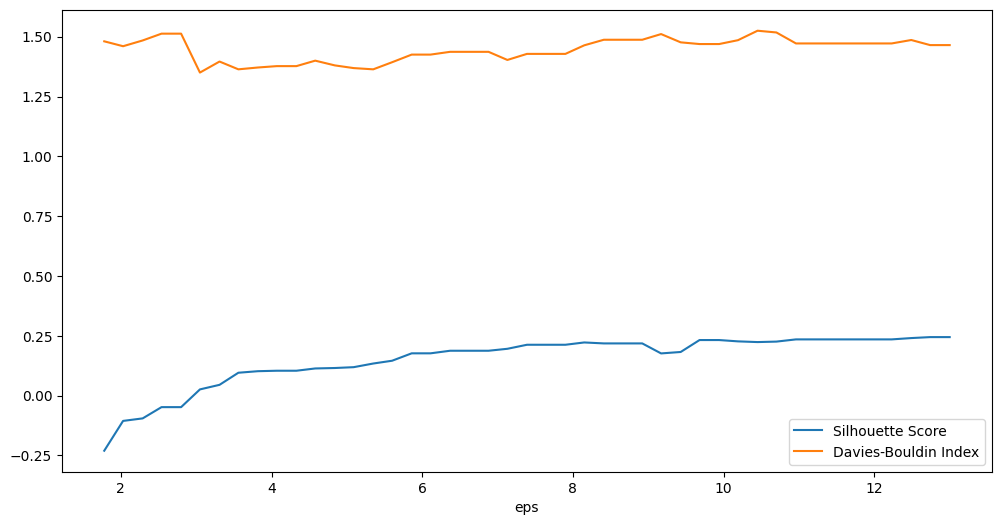

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

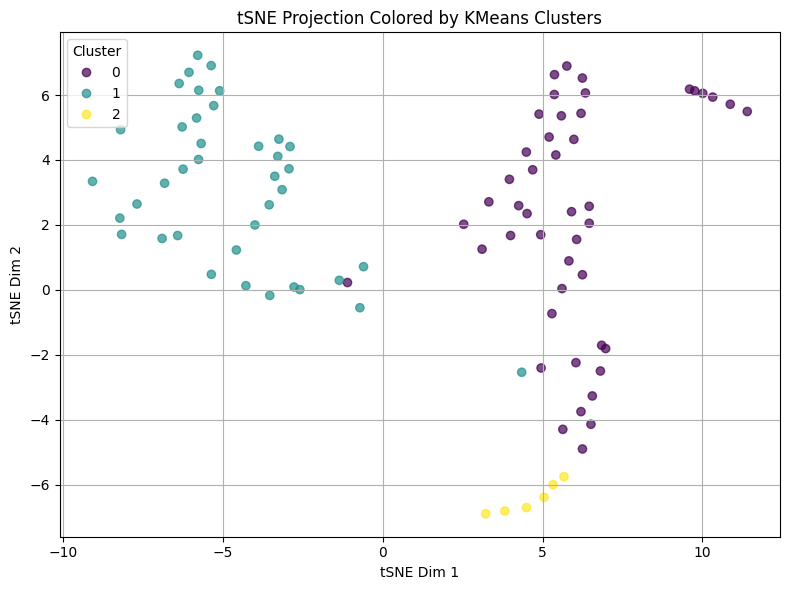

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        12    347          0.652567   
1    0.05            2        11    343          0.653657   
2    0.06            2        12    340          0.641686   
3    0.06            2        12    339          0.640158   
4    0.07            2        12    333          0.631735   
..    ...          ...       ...    ...               ...   
195  0.98            2        11     35          0.116616   
196  0.99            2        11     34          0.113456   
197  0.99            2        11     34          0.113456   
198  1.00            2        11     34          0.113456   
199  1.00            2        10     34          0.169151   

     Davies-Bouldin Index  
0                0.249231  
1                0.212553  
2                0.227006  
3                0.230695  
4                0.206104  
..                    ...  
195              0.581427  
196              0.582920  
197              0.582920  
198              0.582920  
199              0.539268  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

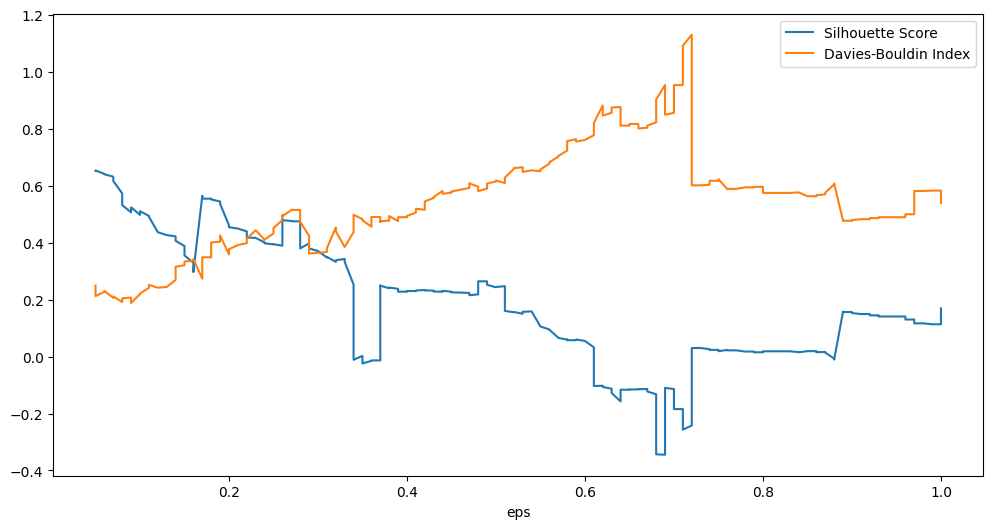

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2018
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2018-12-01 to 2019-02-28
Columns: 383 entries, 10000009 to 9000451
dtypes: float64(383)
memory usage: 270.0 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-12-01  1.051103  0.625634  0.427257  1.029274  0.548316  0.706314   
2018-12-02  1.026376  0.639446  0.497207  1.043229  0.628169  0.824720   
2018-12-03  1.272352  0.782444  0.777802  1.221392  0.712221  0.949352   
2018-12-04  1.321212  0.702299  0.719670  1.177782  0.608928  0.796190   
2018-12-05  1.056093  0.581277  0.495212  1.014403  0.541624  0.696392   
...              ...       ...       ...       ...       ...       ...   
2019-02-24  0.937112  0.707251  0.501387  0.973229  0.561646  0.644633   
2019-02-25  0.917745  0.700430  0.471358  0.961040  0.552795  0.638500   
2019-02-26  0.906219  0.698038  0.457978  0.943222  0.548817  0.635744   
2019-02-27  0.894349  0.694267  0.447507  0.930579  0.542718  0.631518   
2019-02-28  0.888885  0.693560  0.437416  0.916959  0.539105  0.629015   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-12-01  0.797678  0.768754  

          2018-12-01  2018-12-02  2018-12-03  2018-12-04  2018-12-05  \
10000009    0.175855    0.120007    0.176017    0.280339    0.078326   
10000010   -0.043410   -0.080649   -0.087617   -0.086904   -0.076398   
10000011   -0.145643   -0.154413   -0.090115   -0.076596   -0.104444   
10000014    0.164605    0.128747    0.148594    0.195232    0.064741   
10000016   -0.083256   -0.086497   -0.125406   -0.142307   -0.089320   
...              ...         ...         ...         ...         ...   
9000015     0.330889    0.403979    0.564346    0.723884    0.400400   
9000172     0.301888    0.353858    0.465331    0.319903    0.097764   
9000173    -0.067686   -0.171841   -0.300534   -0.319421   -0.147613   
9000293     0.157091    0.486028    0.849793    0.662198    0.228835   
9000451     0.016011    0.008855    0.058267    0.125187    0.027681   

          2018-12-06  2018-12-07  2018-12-08  2018-12-09  2018-12-10  ...  \
10000009    0.098055    0.026342    0.041968    0.071639  

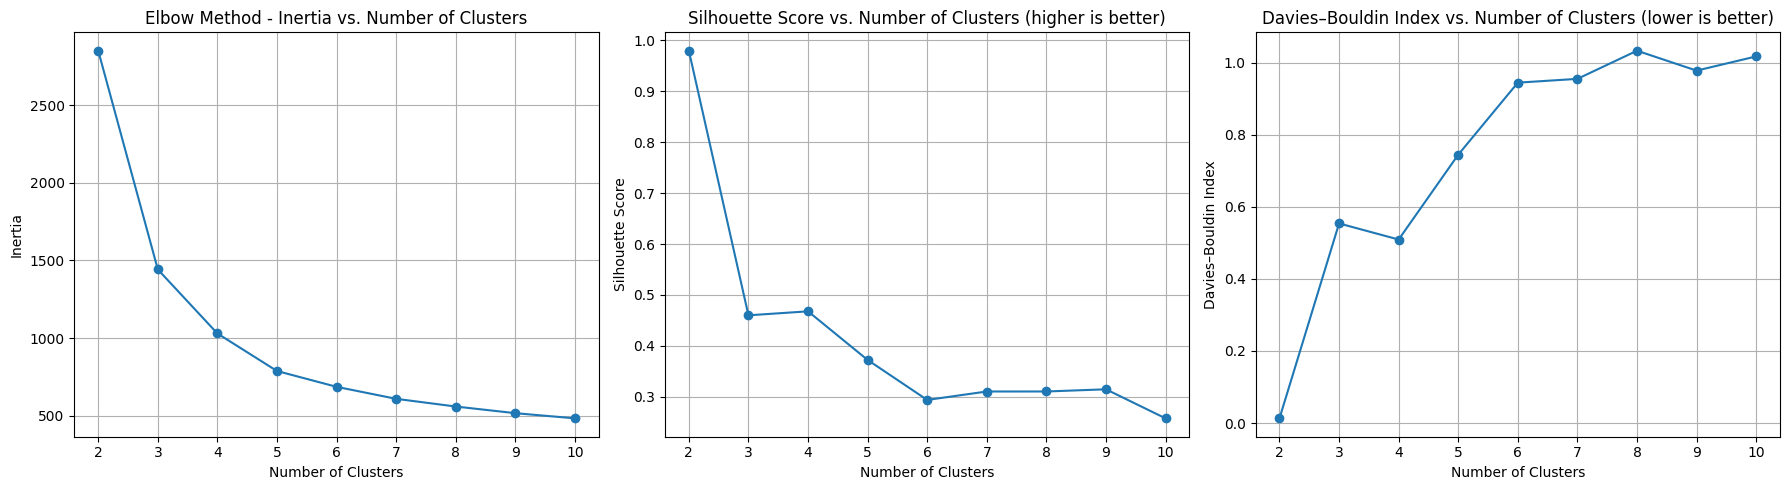

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        2
10000011        2
10000014        0
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2018-12-01  1.051103  0.625634  0.427257  1.029274  0.548316  0.706314   
2018-12-02  1.026376  0.639446  0.497207  1.043229  0.628169  0.824720   
2018-12-03  1.272352  0.782444  0.777802  1.221392  0.712221  0.949352   
2018-12-04  1.321212  0.702299  0.719670  1.177782  0.608928  0.796190   
2018-12-05  1.056093  0.581277  0.495212  1.014403  0.541624  0.696392   
...              ...       ...       ...       ...       ...       ...   
2019-02-24  0.937112  0.707251  0.501387  0.973229  0.561646  0.644633   
2019-02-25  0.917745  0.700430  0.471358  0.961040  0.552795  0.638500   
2019-02-26  0.906219  0.698038  0.457978  0.943222  0.548817  0.635744   
2019-02-27  0.894349  0.694267  0.447507  0.930579  0.542718  0.631518   
2019-02-28  0.888885  0.693560  0.437416  0.916959  0.539105  0.629015   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-12-01  0.797678  0.768754  

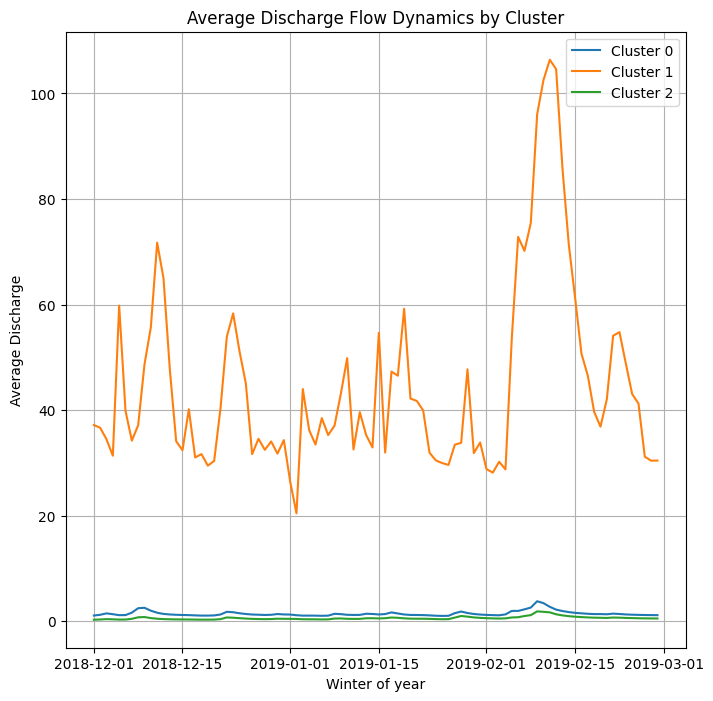

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2018-12-01  1.051103  0.625634  0.427257  1.029274  0.548316  0.706314   
2018-12-02  1.026376  0.639446  0.497207  1.043229  0.628169  0.824720   
2018-12-03  1.272352  0.782444  0.777802  1.221392  0.712221  0.949352   
2018-12-04  1.321212  0.702299  0.719670  1.177782  0.608928  0.796190   
2018-12-05  1.056093  0.581277  0.495212  1.014403  0.541624  0.696392   
...              ...       ...       ...       ...       ...       ...   
2019-02-24  0.937112  0.707251  0.501387  0.973229  0.561646  0.644633   
2019-02-25  0.917745  0.700430  0.471358  0.961040  0.552795  0.638500   
2019-02-26  0.906219  0.698038  0.457978  0.943222  0.548817  0.635744   
2019-02-27  0.894349  0.694267  0.447507  0.930579  0.542718  0.631518   
2019-02-28  0.888885  0.693560  0.437416  0.916959  0.539105  0.629015   

             1000102   1000315  11000011  11000016  ...  67000019   7000003  \
2018-12-01  0.797678  0.768754  1.048195  1.075376  ...  0.039605  1.134119   
2018-12-02  0.921439  0.888026  1.097009  1.304823  ...  0.042529  1.196757   
2018-12-03  1.624209  1.565313  1.185252  1.813286  ...  0.092652  1.741297   
2018-12-04  1.336470  1.288008  1.271085  1.616398  ...  0.122234  1.685309   
2018-12-05  0.884305  0.852239  1.305734  1.322437  ...  0.092379  1.266729   
...              ...       ...       ...       ...  ...       ...       ...   
2019-02-24  0.986597  0.950822  1.708973  1.234343  ...  1.385405  1.320283   
2019-02-25  0.925998  0.892421  1.657987  1.159802  ...  1.310911  1.209543   
2019-02-26  0.876529  0.844745  1.608731  1.129914  ...  1.236452  1.140940   
2019-02-27  0.849936  0.819117  1.558693  1.092112  ...  1.165306  1.076295   
2019-02-28  0.785662  0.757173  1.517096  1.052672  ...  1.110866  1.013044   

             7000333   8000001   9000001   9000015   9000172   9000173  \
2018-12-01  0.996074  1.139765  1.385239  1.351938  1.295662  0.578527   
2018-12-02  1.073687  1.115128  1.622280  1.573964  1.477315  0.463599   
2018-12-03  1.366712  1.556101  2.069958  1.993980  1.809981  0.386783   
2018-12-04  1.176407  1.548008  2.149686  2.068716  1.387889  0.310439   
2018-12-05  0.894345  1.209696  2.123935  2.044465  1.115742  0.362734   
...              ...       ...       ...       ...       ...       ...   
2019-02-24  0.914206  1.253067  1.652973  1.479768  0.990586  2.740265   
2019-02-25  0.871965  1.162005  1.615349  1.445168  0.963658  2.534698   
2019-02-26  0.850398  1.101819  1.577100  1.410019  0.965415  2.395787   
2019-02-27  0.836541  1.059881  1.536786  1.373010  1.011401  2.536691   
2019-02-28  0.809272  1.020515  1.499186  1.338488  0.963784  2.660095   

             9000293   9000451  
2018-12-01  1.014694  0.740937  
2018-12-02  1.732183  0.812039  
2018-12-03  2.524423  1.053539  
2018-12-04  1.964757  1.059735  
2018-12-05  1.517969  0.900672  
...              ...       ...  
2019-02-24  1.375575  0.917619  
2019-02-25  1.266709  0.867281  
2019-02-26  1.168195  0.840260  
2019-02-27  1.136282  0.812666  
2019-02-28  1.087314  0.785641  

[90 rows x 383 columns]

<Axes: >

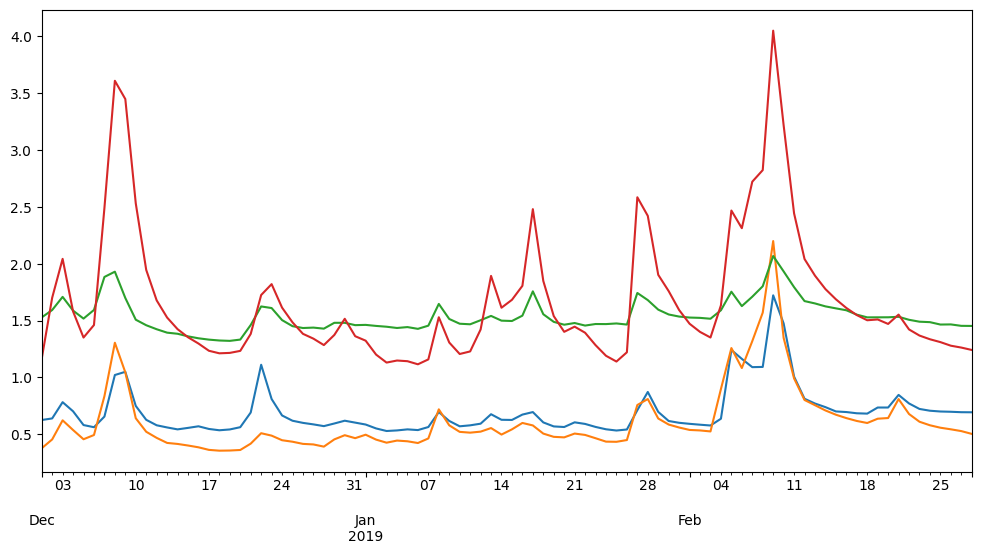

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

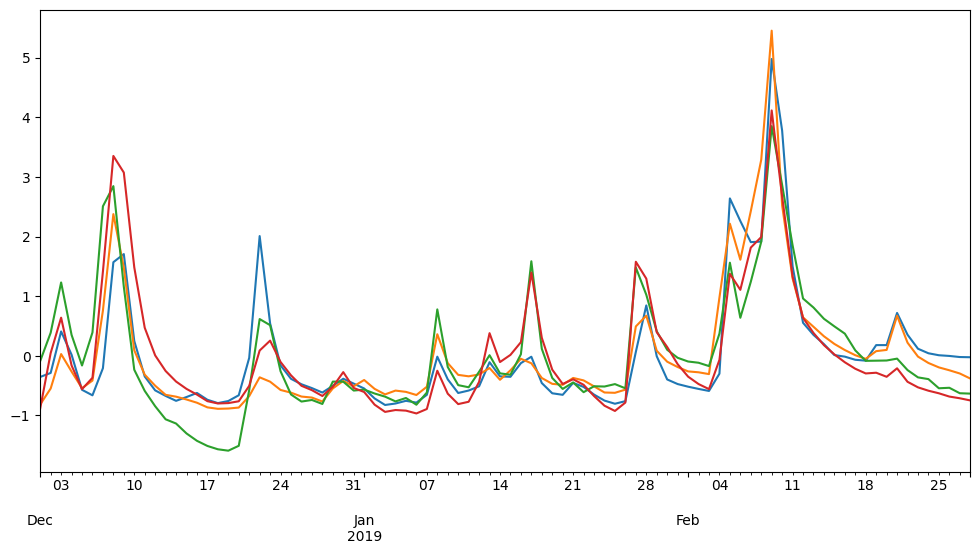

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

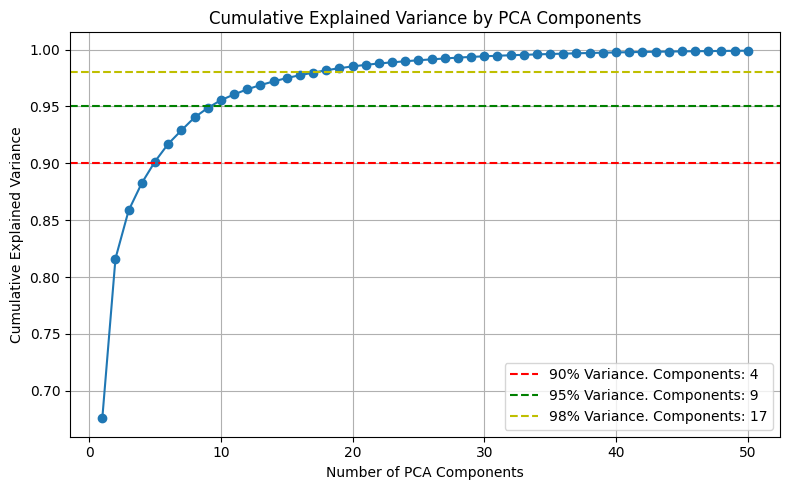

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-16.07646993,   6.54138913,   1.04698067, ...,   0.16832869,
          0.68298047,   0.60695223],
       [-12.52825006,   8.79332017,  -0.21654703, ...,   0.7203227 ,
          0.68837212,   0.46743402],
       [ -6.05582725,  11.99655296,   0.44219004, ...,   0.11787298,
          0.72882712,   0.17352208],
       ...,
       [ -4.60802958,  -6.65804405,  -0.53172119, ...,  -0.20122143,
          0.23438003,   0.38882236],
       [ -5.43709332,  -6.25105074,  -0.6403846 , ...,  -0.15249864,
          0.52416568,   0.90106852],
       [ -6.06787679,  -6.16276931,  -0.74434887, ...,  -0.55389991,
          0.70566818,   0.68510063]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


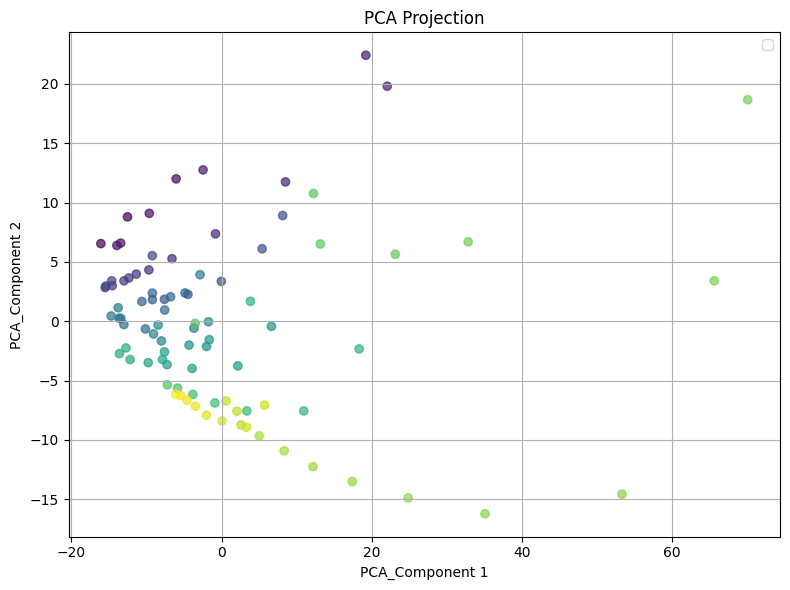

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_49280\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


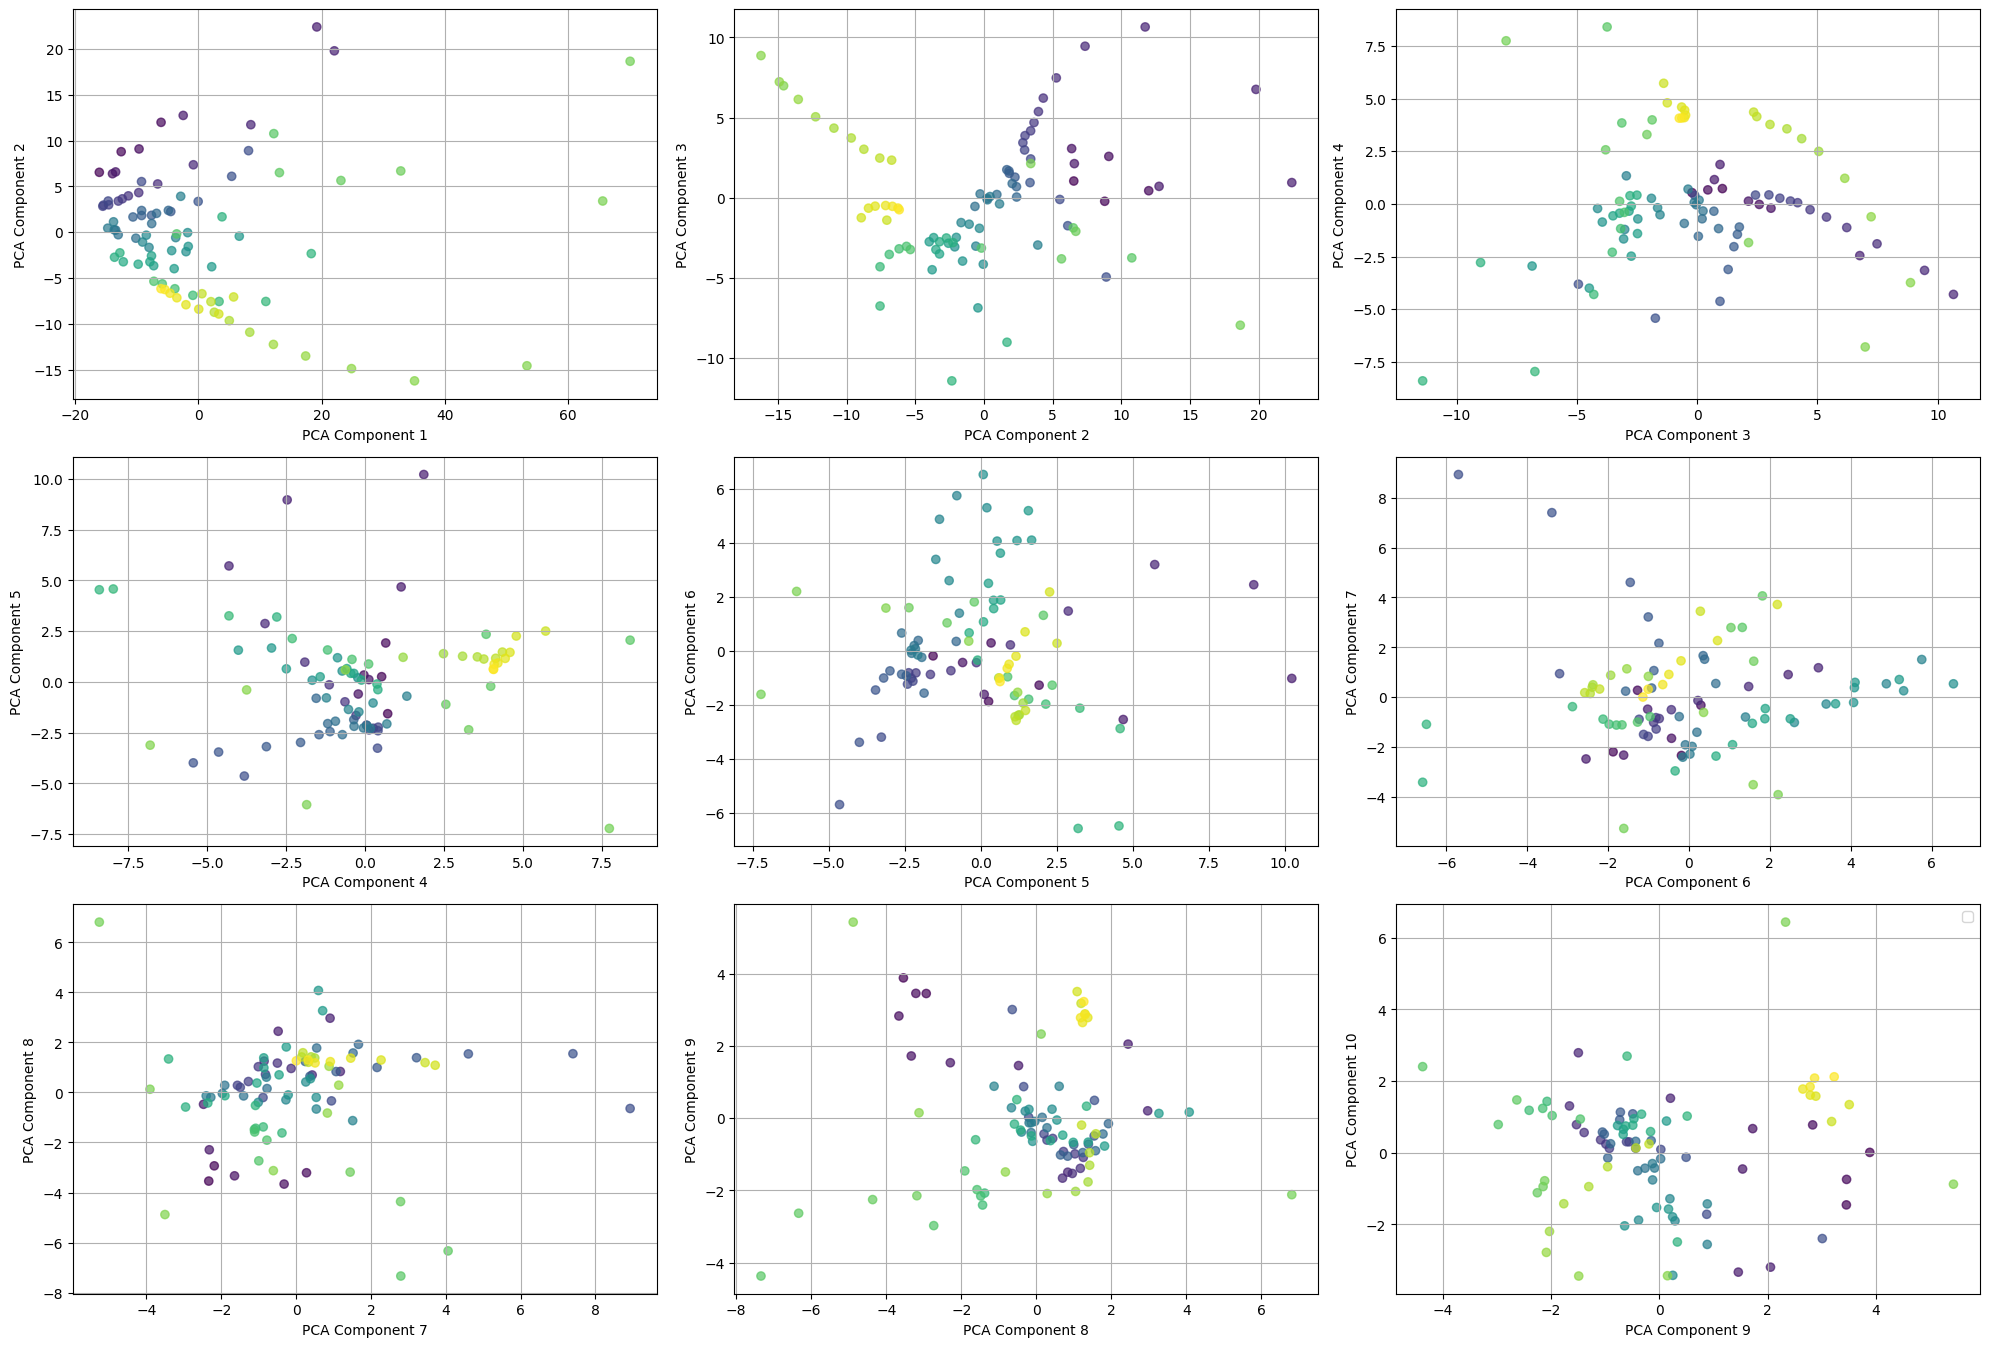

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.356
KMeans Davies-Bouldin Index is 1.104


<Axes: xlabel='k'>

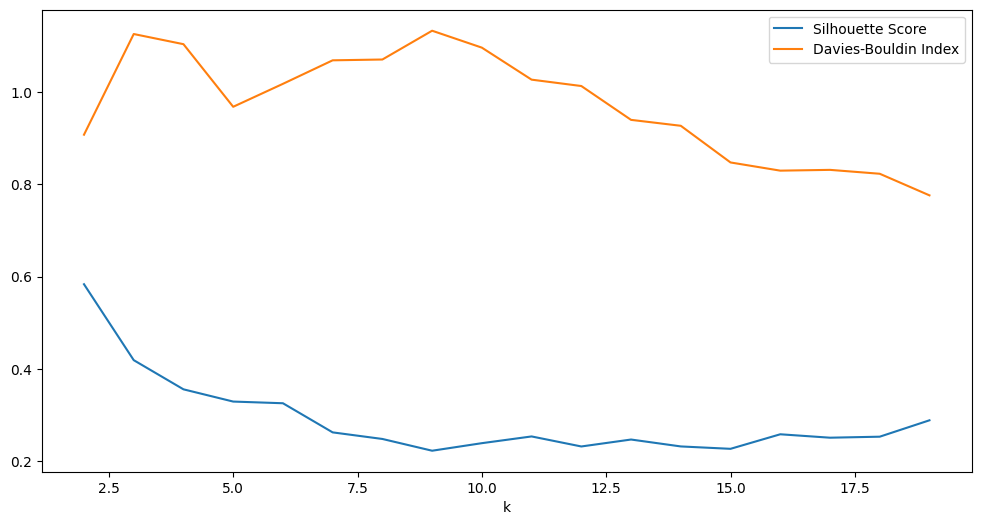

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         0     90               NaN   
3    1.27            3         0     90               NaN   
4    1.52            3         2     84         -0.171959   
5    1.78            3         4     75         -0.192111   
6    2.03            3         3     75         -0.178052   
7    2.29            3         6     65         -0.129980   
8    2.54            3         8     56         -0.047569   
9    2.80            3         8     55         -0.041964   
10   3.05            3         7     53         -0.023856   
11   3.31            3         7     51         -0.001492   
12   3.56            3         8     47          0.036004   
13   3.82            3         8     45          0.052813   
14   4.07            3         8     43          0.055229   
15   4.33            3         8     43          0.055229   
16   4.58            3         9     38          0.091879   
17   4.84            3        10     34          0.136461   
18   5.09            3        10     32          0.138016   
19   5.35            3        10     30          0.157607   
20   5.60            3         8     29          0.139489   
21   5.86            3         5     29          0.094307   
22   6.11            3         4     27          0.047118   
23   6.37            3         4     26          0.058169   
24   6.62            3         3     23          0.169563   
25   6.88            3         2     23          0.246633   
26   7.13            3         2     23          0.246633   
27   7.39            3         2     20          0.246688   
28   7.64            3         2     20          0.246688   
29   7.90            3         2     19          0.255132   
30   8.15            3         2     17          0.259029   
31   8.41            3         1     16               NaN   
32   8.66            3         1     15               NaN   
33   8.92            3         1     15               NaN   
34   9.17            3         1     15               NaN   
35   9.43            3         1     14               NaN   
36   9.68            3         1     14               NaN   
37   9.94            3         1     14               NaN   
38  10.19            3         1     14               NaN   
39  10.45            3         1     13               NaN   
40  10.70            3         1     13               NaN   
41  10.96            3         1     13               NaN   
42  11.21            3         1     13               NaN   
43  11.47            3         1     13               NaN   
44  11.72            3         2      8          0.415159   
45  11.98            3         2      7          0.403033   
46  12.23            3         2      7          0.403033   
47  12.49            3         2      6          0.399852   
48  12.74            3         2      6          0.399852   
49  13.00            3         2      6          0.399852   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               1.041026  
5               1.235996  
6               1.301361  
7               1.378760  
8               1.338876  
9               1.343173  
10              1.373616  
11              1.389030  
12              1.356761  
13              1.371319  
14              1.368673  
15              1.368673  
16              1.400138  
17              1.257526  
18              1.258177  
19              1.214897  
20              1.232591  
21              1.356407  
22              1.381459  
23              1.340291  
24              1.326338  
25              1.352930  
26              1.352930  
27              1.280520  
28              1.280520  
29              1.232531  
30              1.184449  
31                   NaN  
32 

<Axes: xlabel='eps'>

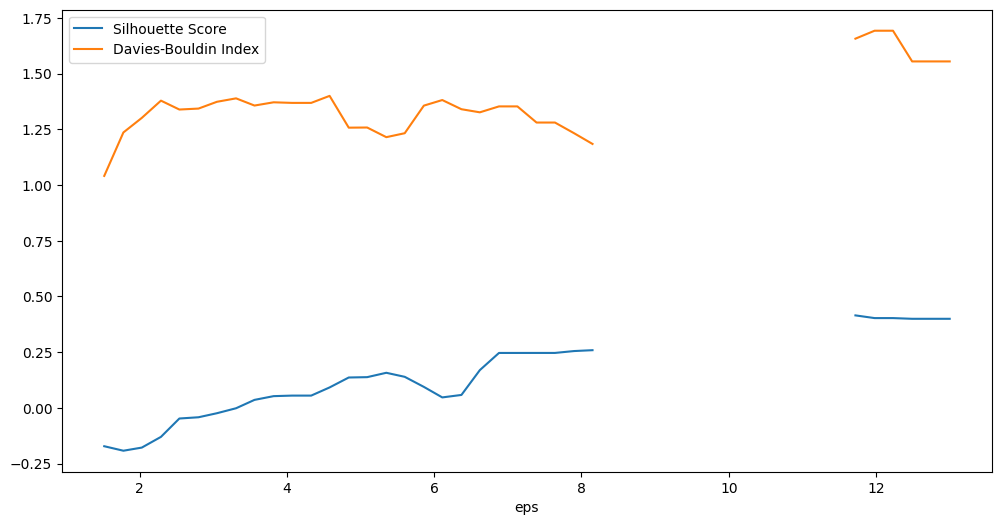

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

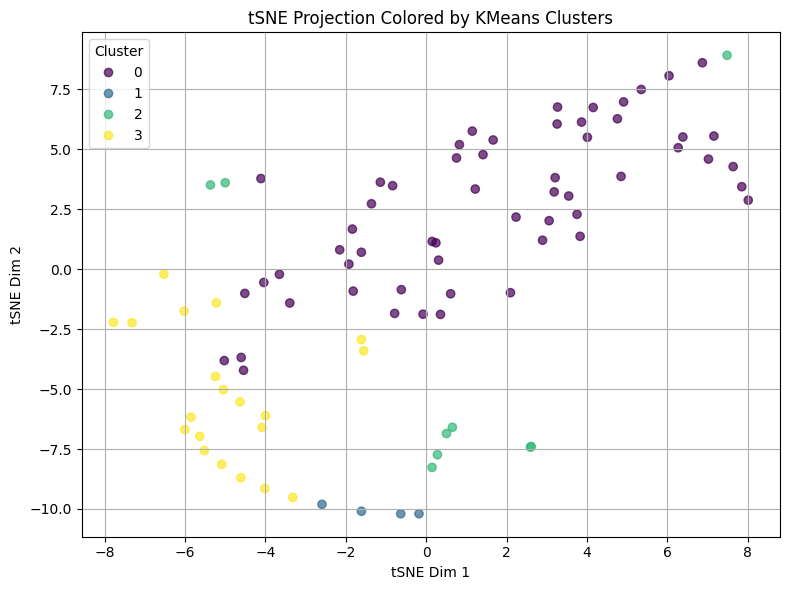

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    373          0.989902   
1    0.05            2         7    369          0.978995   
2    0.06            2         8    367          0.976481   
3    0.06            2         8    367          0.976481   
4    0.07            2         9    365          0.959488   
..    ...          ...       ...    ...               ...   
195  0.98            2         4     20         -0.001139   
196  0.99            2         4     20         -0.001139   
197  0.99            2         4     20         -0.001139   
198  1.00            2         4     20         -0.001139   
199  1.00            2         4     19         -0.002409   

     Davies-Bouldin Index  
0                0.013661  
1                0.027996  
2                0.029137  
3                0.029137  
4                0.048465  
..                    ...  
195              0.938944  
196              0.938944  
197              0.938944  
198              0.938944  
199              0.940215  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

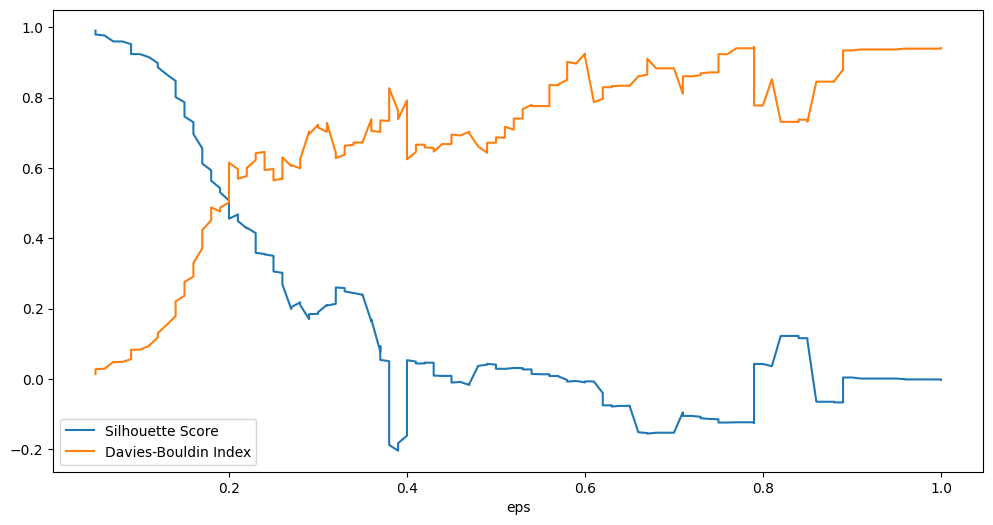

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))